# Project Goal:

- To Predict the sales of each product at each Big Mart Outlet.
- To understand the factors that influence sales (product and store characteristics).
- To enable Big Mart to make data-driven decisions for improved profitability and customer service.

The Dataset is downloaded from Kaggle.

***Dataset link:*** https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets

## 1. Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
import joblib

In [59]:
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor

In [4]:
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
df_original = pd.read_csv("D:/Downloads/archive (3)/train.csv")
train = df_original.copy()
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 2. Understanding data and Initial EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
print("\n--- Descriptive statistics of numerical data ---")
train.describe()


--- Descriptive statistics of numerical data ---


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
print("\n--- Descriptive statistics of categorical data ---")
train.describe(include="object")


--- Descriptive statistics of categorical data ---


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
print("\n--- Value counts for categorical features ---")
categorical_cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type",
                    "Outlet_Type", "Outlet_Establishment_Year"]
for colm in categorical_cols:
    if colm in train.columns:
        print(f"\nValue counts for {colm}:")
        print(train[colm].value_counts(dropna=False))  # Show NaNs in value_counts
        print("=="*20)


--- Value counts for categorical features ---

Value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Value counts for Outlet_I


--- Distribution of unprocessed numerical and target variable (Item_Outlet_Sales) ---


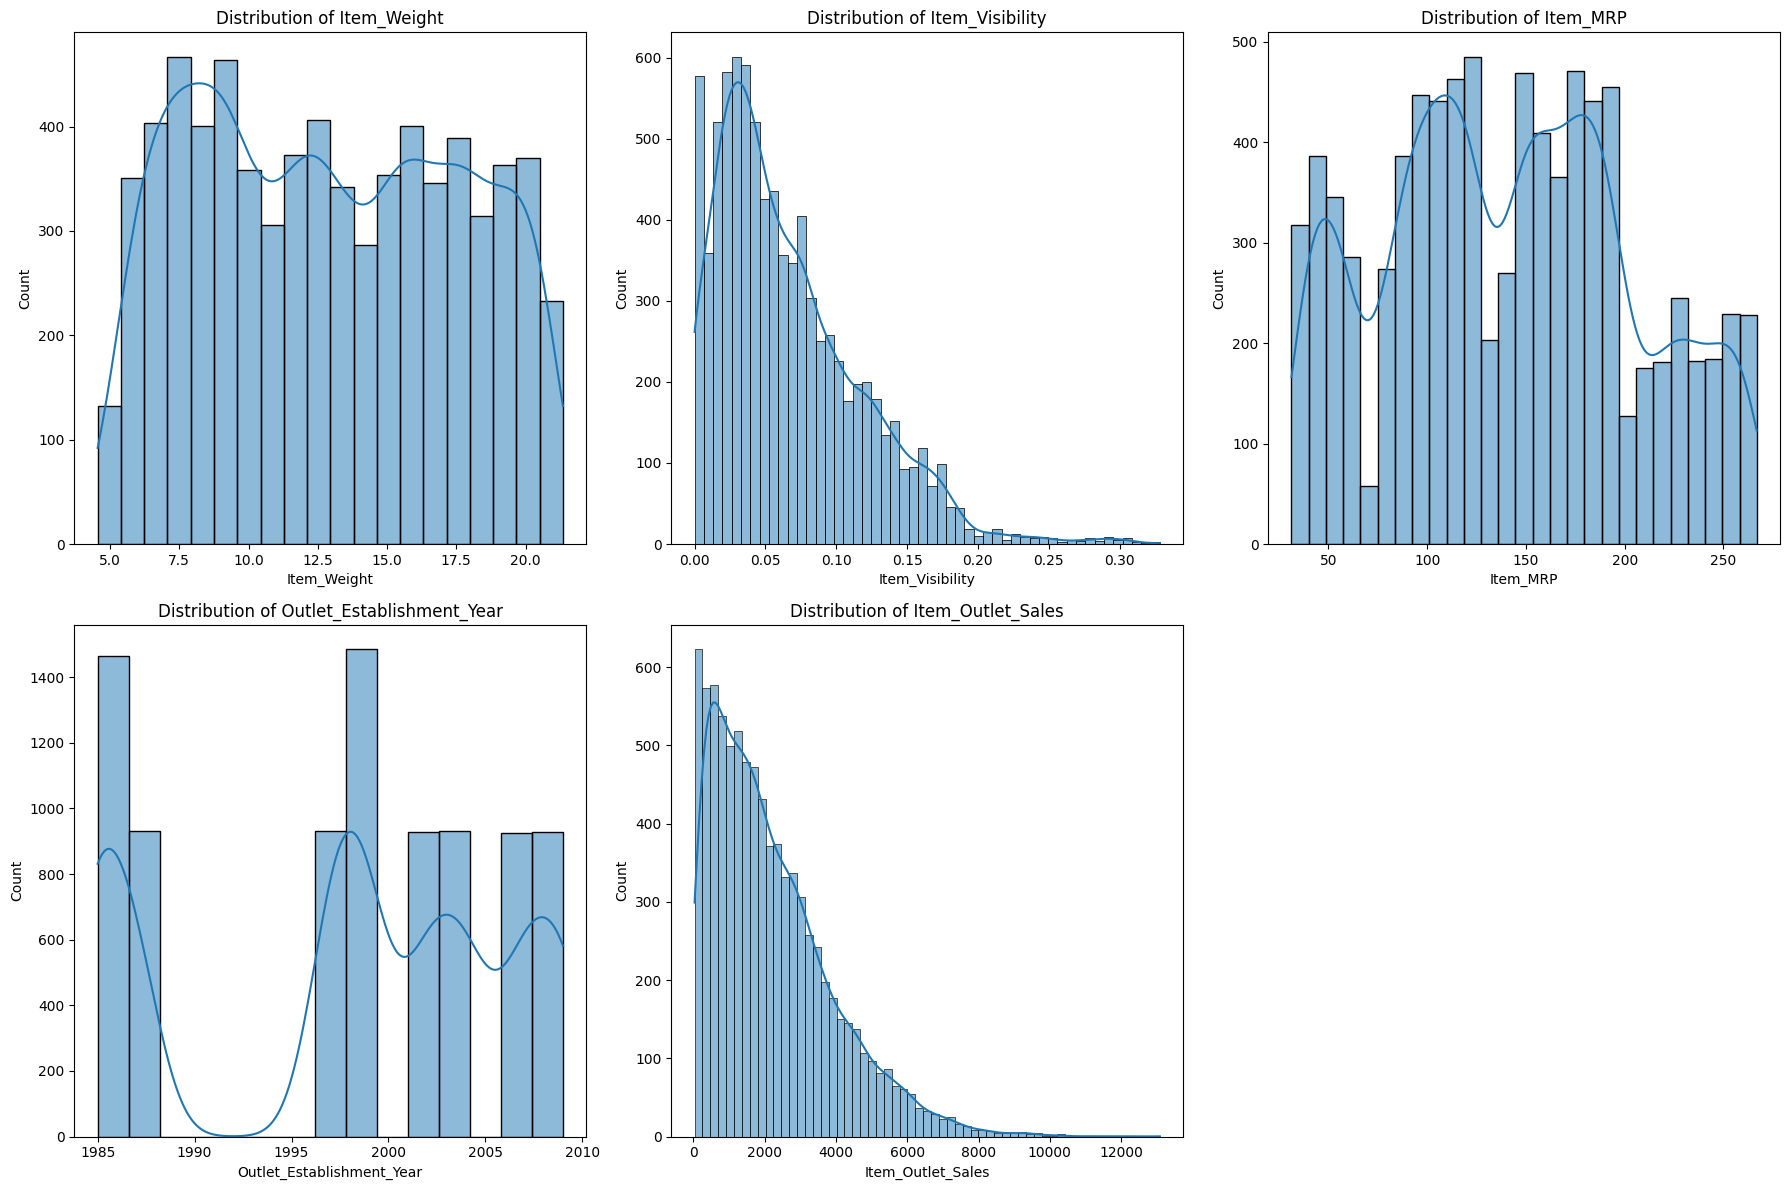

In [9]:
numerical_cols = ["Item_Weight", "Item_Visibility",	"Item_MRP",	"Outlet_Establishment_Year",	"Item_Outlet_Sales"]
print('\n--- Distribution of unprocessed numerical and target variable (Item_Outlet_Sales) ---')
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- **Item_Weight:** The distribution appears somewhat uniform, with a slight tendency for more items to fall in the 7.5 to 12.5 and 15 to 18 ranges. There are no clear strong peaks, suggesting item weights are relatively spread out across the observed range.  Item weights primarily range from approximately 5 to 20 units.

- **Item_Visibility:** This is a highly right-skewed (or positively skewed) distribution, meaning the tail extends much further to the right. There's a very strong peak at the lower end of item visibility. Item visibility values are concentrated between 0.00 and 0.10, with a few items having higher visibility up to around 0.30.

- **Item_MRP:**  The distribution of Item_MRP appears to be multi-modal, with several distinct peaks. There are noticeable peaks around 70-80, 100-110, 130-150, 170-190, and a smaller peak around 240-250. Item MRPs range from approximately 30 to 270.

- **Outlet_Establishment_Year:** This histogram shows distinct spikes at specific years, indicating that outlets were established in particular batches or periods. There are major peaks around 1985, 1998, and 2007. Outlet establishment years range from 1985 to 2009. Big Mart seems to have opened a significant number of its outlets in specific years (e.g., 1985, 1998, 2007). This could correspond to periods of aggressive expansion or the opening of new store formats.

- **Item_Outlet_Sales:** This is another highly right-skewed distribution, similar to Item_Visibility. There's a strong concentration of sales at the lower end, with a long tail extending to higher sales values. Most item sales are concentrated below 2000, with a few items generating sales up to around 12,000.

## 3. Data Cleaning and Preprocessing

### 3.1 Missing Value Imputation

In [10]:
print("\n--- Missing Values before Imputation ---")
train.isnull().sum()


--- Missing Values before Imputation ---


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two columns with missing values, `Item_Weight` a numerical column and `Outlet_Size` a categorical column.



*   **Outlet_Size:** It is highly probable that `Outlet_Type` and `Outlet_Size` are correlated. For example if we take `Grocery Store` as `Outlet_Type` then, `Grocery Store` outlets are typically smaller in size, focusing on everyday essentials. It's improbable they would be classified as "High" size. They are most likely "Small" or sometimes "Medium". `Supermarket Type1` outlets are generally the most common and standard supermarket format. These can range from "Small" to "Medium" or even "High" depending on the specific store and location. However, "Medium" is often the most prevalent. In conclusion, we will impute missing values based on the most frequent `Outlet_size` for each `Outlet_Type`.

*   **Distribution of Item_Weight:** The histogram showed a distribution that was somewhat uniform, without extreme skewness or clear outliers on one side. There were slight tendencies for more items to fall into certain weight ranges, but it didn't look heavily skewed to one side or the other, nor did it have a very long tail. So, we will go with the mean for `Item_Weight` imputation, as its distribution appears relatively symmetrical or uniform.



#### 3.1.1 Imputing missing values in categorical Features

In [11]:
# ---  Explore the relationship between Outlet_Type and Outlet_Size using Crosstabulation ---
print("\n--- Crosstabulation of Outlet_Type and Outlet_Size ---")
crosstab = pd.crosstab(train['Outlet_Type'], train['Outlet_Size'], dropna=False) # dropna=False to include NaNs if any in 'Outlet_Size'
crosstab


--- Crosstabulation of Outlet_Type and Outlet_Size ---


Outlet_Size,High,Medium,Small,NaN
Outlet_Type,,,,
Grocery Store,0,0,528,555
Supermarket Type1,932,930,1860,1855
Supermarket Type2,0,928,0,0
Supermarket Type3,0,935,0,0


In [12]:
# To see proportions, which is often more insightful:
print("\n--- Proportions of Outlet_Size within each Outlet_Type ---")
crosstab_prop = pd.crosstab(train['Outlet_Type'], train['Outlet_Size'], normalize='index', dropna=False)
crosstab_prop


--- Proportions of Outlet_Size within each Outlet_Type ---


Outlet_Size,High,Medium,Small,NaN
Outlet_Type,,,,
Grocery Store,0.000000,0.000000,0.487535,0.512465
Supermarket Type1,0.167115,0.166756,0.333513,0.332616
Supermarket Type2,0.000000,1.000000,0.000000,0.000000
Supermarket Type3,0.000000,1.000000,0.000000,0.000000


In [13]:
# ---  Impute missing values based on the most frequent size for each type ---
#  Find the most frequent Outlet_Size for each Outlet_Type
#    We will use a dictionary to store these mappings
outlet_type_size_mapping = train.groupby('Outlet_Type')['Outlet_Size'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
).to_dict()

print("\n--- Imputation Mapping ---")
print(outlet_type_size_mapping)


--- Imputation Mapping ---
{'Grocery Store': 'Small', 'Supermarket Type1': 'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}


In [14]:
# Fill missing 'Outlet_Size' values using the mapping
train['Outlet_Size'] = train.apply(
    lambda row: outlet_type_size_mapping[row['Outlet_Type']] if pd.isna(row['Outlet_Size']) else row['Outlet_Size'],
    axis=1
)

In [15]:
print("\nMissing values after imputation:")
print(train['Outlet_Size'].isnull().sum())


Missing values after imputation:
0


#### 3.1.2 Imputing missing values in Numerical Features.

In [16]:
# Impute Item_Weight with mean
mean_Item_Weight = train['Item_Weight'].mean()
train.fillna({'Item_Weight':mean_Item_Weight}, inplace=True)
print(f"Filled NaNs in Item_Weight with mean: {mean_Item_Weight}")

Filled NaNs in Item_Weight with mean: 12.857645184135976


In [17]:
print("\n--- Missing Values After Imputation in training data ---")
train.isnull().sum()


--- Missing Values After Imputation in training data ---


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3.2 Feature Engineering

We are going to create two new following features:

1. **`Outlet_Age`:** This numerical feature represents how old an outlet is.

  * **Reasoning:** Older outlets might have more established customer bases, better brand recognition, or different operational efficiencies compared to newer ones, all of which can influence sales.

2. **`Item_MRP_Category`:** This categorical feature groups Item_MRP (Maximum Retail Price) into distinct price tiers.

  * **Reasoning:** As observed in the histogram, `Item_MRP` has multiple peaks, suggesting natural pricing segments. Items in different price categories often appeal to different customer segments and thus have different sales volumes.




In [18]:
# ---  Create 'Outlet_Age' feature ---
# Assuming the current year (2025) for calculation
current_year = 2025
train['Outlet_Age'] = current_year - train['Outlet_Establishment_Year']
print(f"\n'Outlet_Age' feature created (calculated from {current_year}).")


'Outlet_Age' feature created (calculated from 2025).


In [19]:
# ---  Create 'Item_MRP_Category' feature ---
# Based on the multi-modal distribution observed for Item_MRP
bins = [0, 100, 150, 200, np.inf]
labels = ['Low', 'Mid', 'High', 'Very High']
train['Item_MRP_Category'] = pd.cut(train['Item_MRP'], bins=bins, labels=labels, right=False)
print("\n'Item_MRP_Category' feature created.")


'Item_MRP_Category' feature created.


In [20]:
print("\n--- A look at new features ---")
train[["Outlet_Age", "Item_MRP_Category"]]


--- A look at new features ---


,Outlet_Age,Item_MRP_Category
0,26,Very High
1,16,Low
2,26,Mid
3,27,High
4,38,Low
...,...,...
8518,38,Very High
8519,23,Mid
8520,21,Low
8521,16,Mid


### 3.3 Handling Skewed numerical Features

#### 3.3.1 Log Transformation

In [21]:
# Item_Visibility and Item_Outlet_Sales are positively skewed.
numerical_skewed = ["Item_Visibility", "Item_Outlet_Sales"]
print("\n--- Applying Log Transformation to Skewed Numerical Features ---")
for col in numerical_skewed:
    train[col+"_log"] = np.log1p(train[col]) # log1p handles 0 values better (log(1+x))
    print(f"Applied log1p transformation to {col}")


--- Applying Log Transformation to Skewed Numerical Features ---
Applied log1p transformation to Item_Visibility
Applied log1p transformation to Item_Outlet_Sales


#### 3.3.2 Square Root Transformation

In [22]:
# --- Apply Square Root Transformation ---
train['Item_Outlet_Sales_sqrt'] = np.sqrt(train['Item_Outlet_Sales'])
train['Item_Visibility_sqrt'] = np.sqrt(train['Item_Visibility'])

### 3.4 Handling Inconsistent Entries for Item_Fat_Content

In [23]:
# Get unique values in Item_Fat_Content
unique_fat_content = train['Item_Fat_Content'].unique()

print("\nUnique values in 'Item_Fat_Content' feature:")
print(unique_fat_content)


Unique values in 'Item_Fat_Content' feature:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [24]:
train.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)
print("\n--- After correcting inconsistent entries ---")
train["Item_Fat_Content"].unique()


--- After correcting inconsistent entries ---


array(['Low Fat', 'Regular'], dtype=object)

## 4. Further EDA on Processed Data

### 4.1. Univariate Analysis (Visualizations for Numerical Features after Transformation)


--- Distribution of processed numerical and target variable (Item_Outlet_Sales) ---


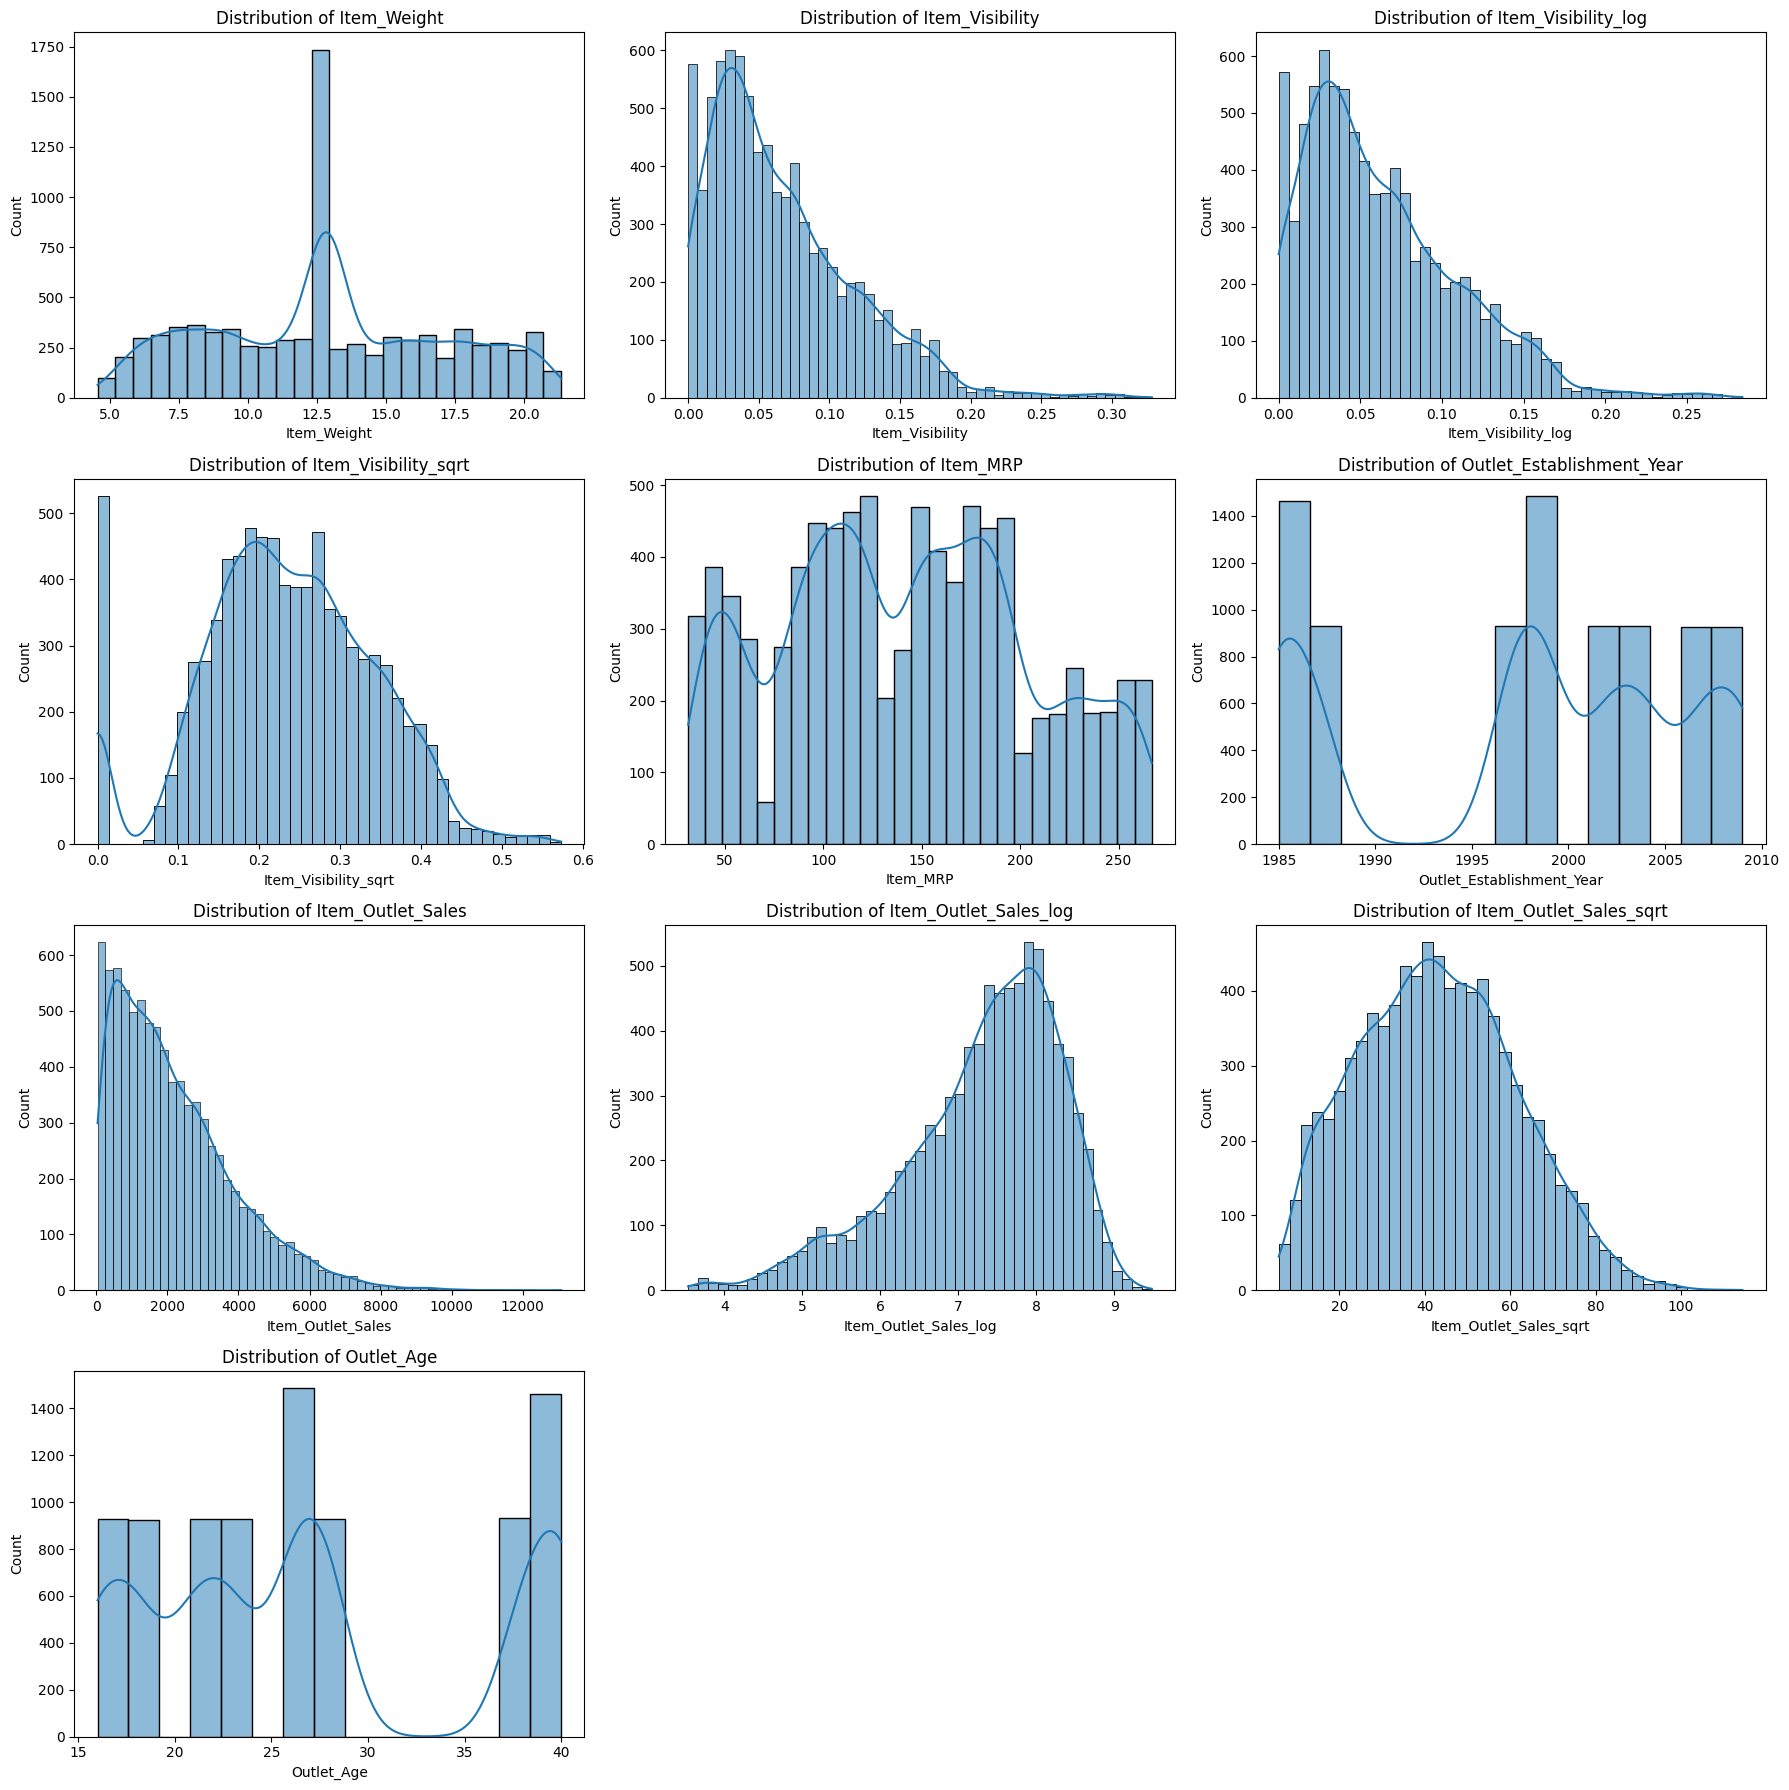

In [25]:
numerical_cols_processed = ["Item_Weight", "Item_Visibility", "Item_Visibility_log", "Item_Visibility_sqrt", "Item_MRP",
                            "Outlet_Establishment_Year", "Item_Outlet_Sales", "Item_Outlet_Sales_log", "Item_Outlet_Sales_sqrt", "Outlet_Age"]
print('\n--- Distribution of processed numerical and target variable (Item_Outlet_Sales) ---')
plt.figure(figsize=(18, 18))
for i, col in enumerate(numerical_cols_processed):
    plt.subplot(4, 3, i + 1)
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### ***Item_Visibility (Original vs Log Transformed vs SQRT Transformed)***

- **Item_Visibility_log (log transformed):** This histogram shows a distribution that is significantly more symmetrical and closer to a normal (bell-shaped) curve compared to the **Item_Visibility (original)** right-skewed distribution. The log transformation has successfully pulled the values together and reduced the long tail.

- **Item_Visibility_sqrt (Square Root Transformed):** This histogram still appears positively (right) skewed. While the square root transformation has reduced the skewness somewhat compared to the original, it's clearly not as effective as the log transformation in making the distribution symmetrical.

**Conclusion for** `Item_Visibility`: The Log Transformation is generally better for **Item_Visibility** as it results in a distribution that is much closer to normal, which is often beneficial for linear models.

##### ***Item_Outlet_Sales (Original vs Log Transformed vs SQRT Transformed)***

- **Item_Outlet_Sales (Log Transformed):** This histogram clearly shows a negatively (left) skewed distribution. The log transformation over-corrected the original positive skewness.

- **Item_Outlet_Sales (Square Root Transformed):** This histogram shows a distribution that is much more symmetrical and closer to a normal curve than both the original positively skewed distribution and the log-transformed negatively skewed distribution. It appears to have done a good job of balancing the spread.

**Conclusion for** `Item_Outlet_Sales`: The Square Root Transformation is generally better for Item_Outlet_Sales as it produces a distribution that is significantly more symmetrical and less skewed than the log-transformed version. For target variables in regression, aiming for a more normal distribution is usually preferred.

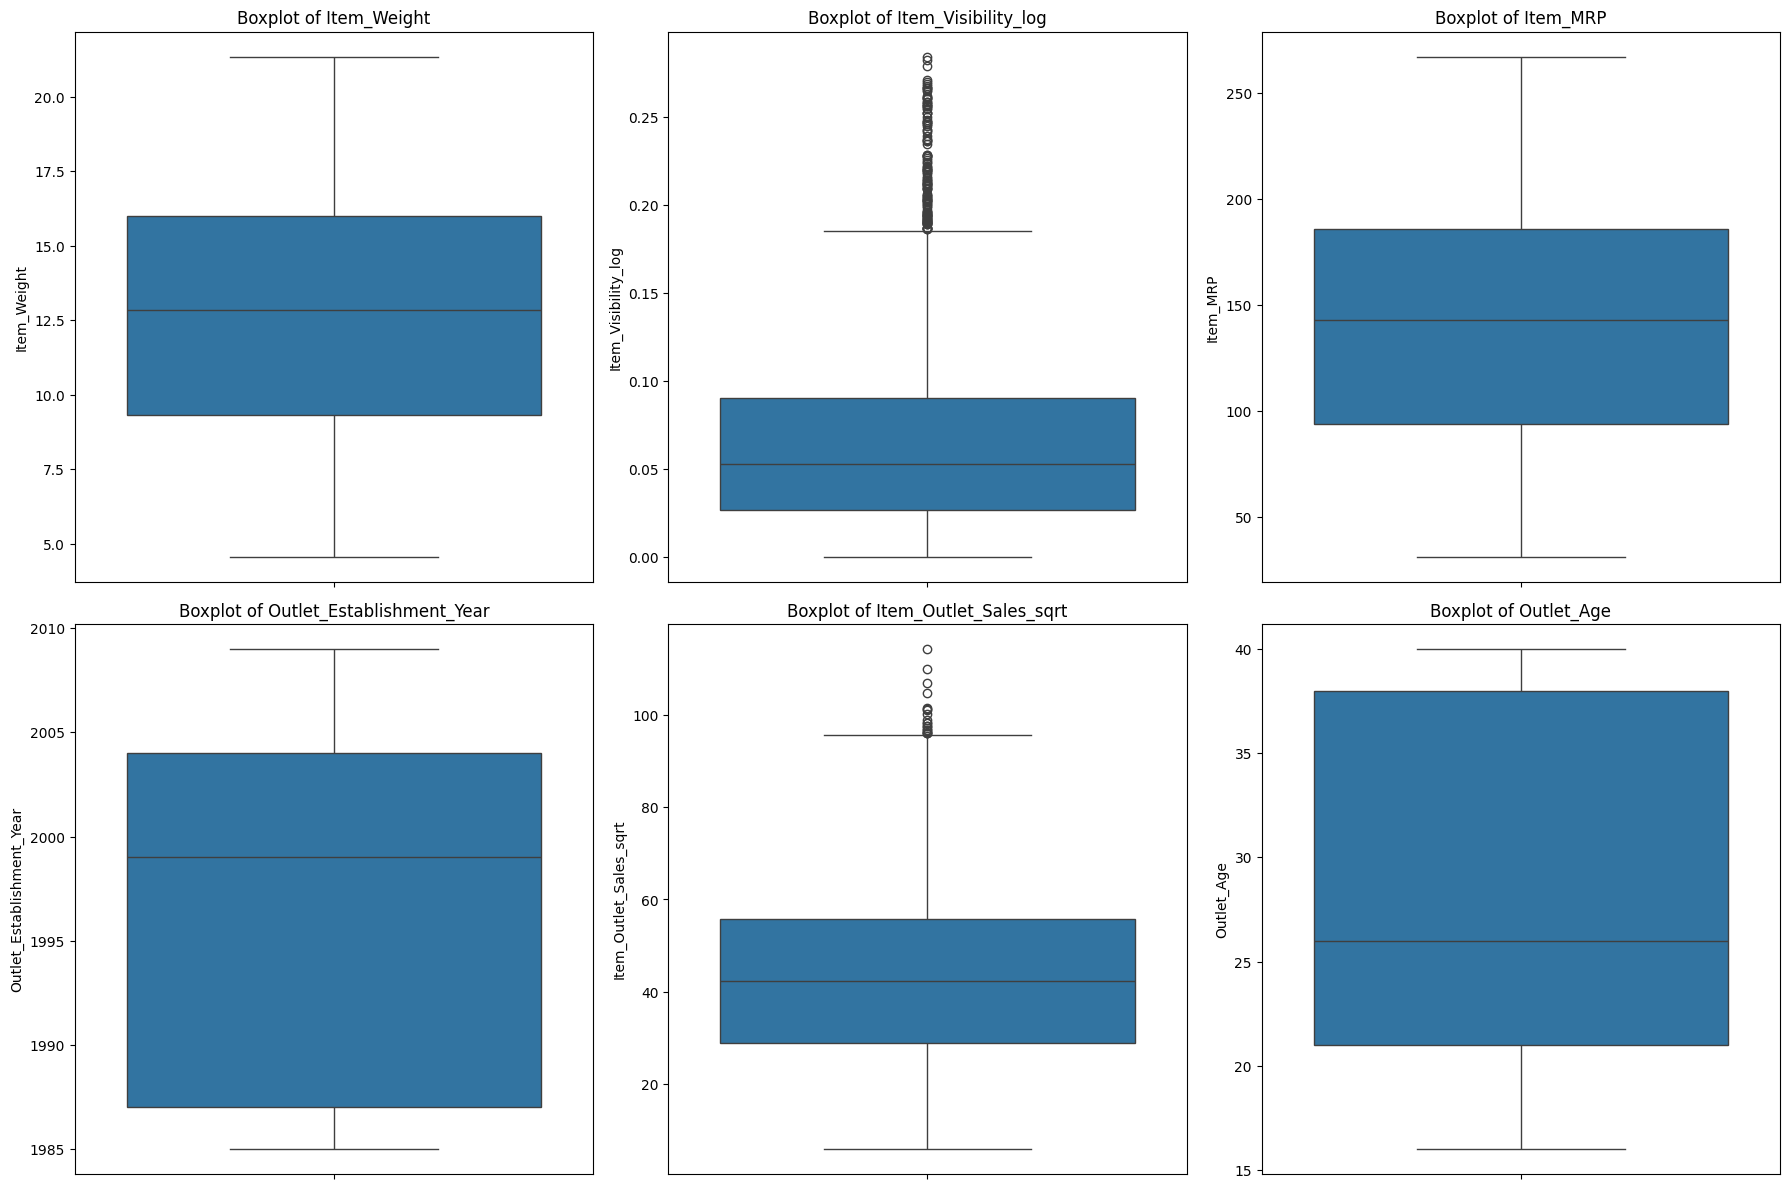

In [26]:
numerical_cols_processed1 = ["Item_Weight", "Item_Visibility_log", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales_sqrt",
                            "Outlet_Age"] # Item_Visibility, Item_Outlet_Sales, Item_Visibility_sqrt, Item_Outlet_Sales_log removed.
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols_processed1):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis (Features vs Target)

#### 4.2.1 Bivariate Analysis: Numerical Features vs. Target Variable (Item_Outlet_Sales_sqrt)

In [27]:
numerical_features = ["Item_Weight", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Age", "Item_Visibility_log"]

print("\n--- Numerical Features vs. Item_Outlet_Sales_sqrt ---")

# Calculate and print Pearson correlation coefficients
print("\nPearson Correlation with Item_Outlet_Sales_sqrt:")
for col in numerical_features:
    correlation = train[col].corr(train['Item_Outlet_Sales_sqrt'])
    print(f"{col}: {correlation:.4f}")


--- Numerical Features vs. Item_Outlet_Sales_sqrt ---

Pearson Correlation with Item_Outlet_Sales_sqrt:
Item_Weight: 0.0109
Item_MRP: 0.5634
Outlet_Establishment_Year: 0.0075
Outlet_Age: -0.0075
Item_Visibility_log: -0.1578


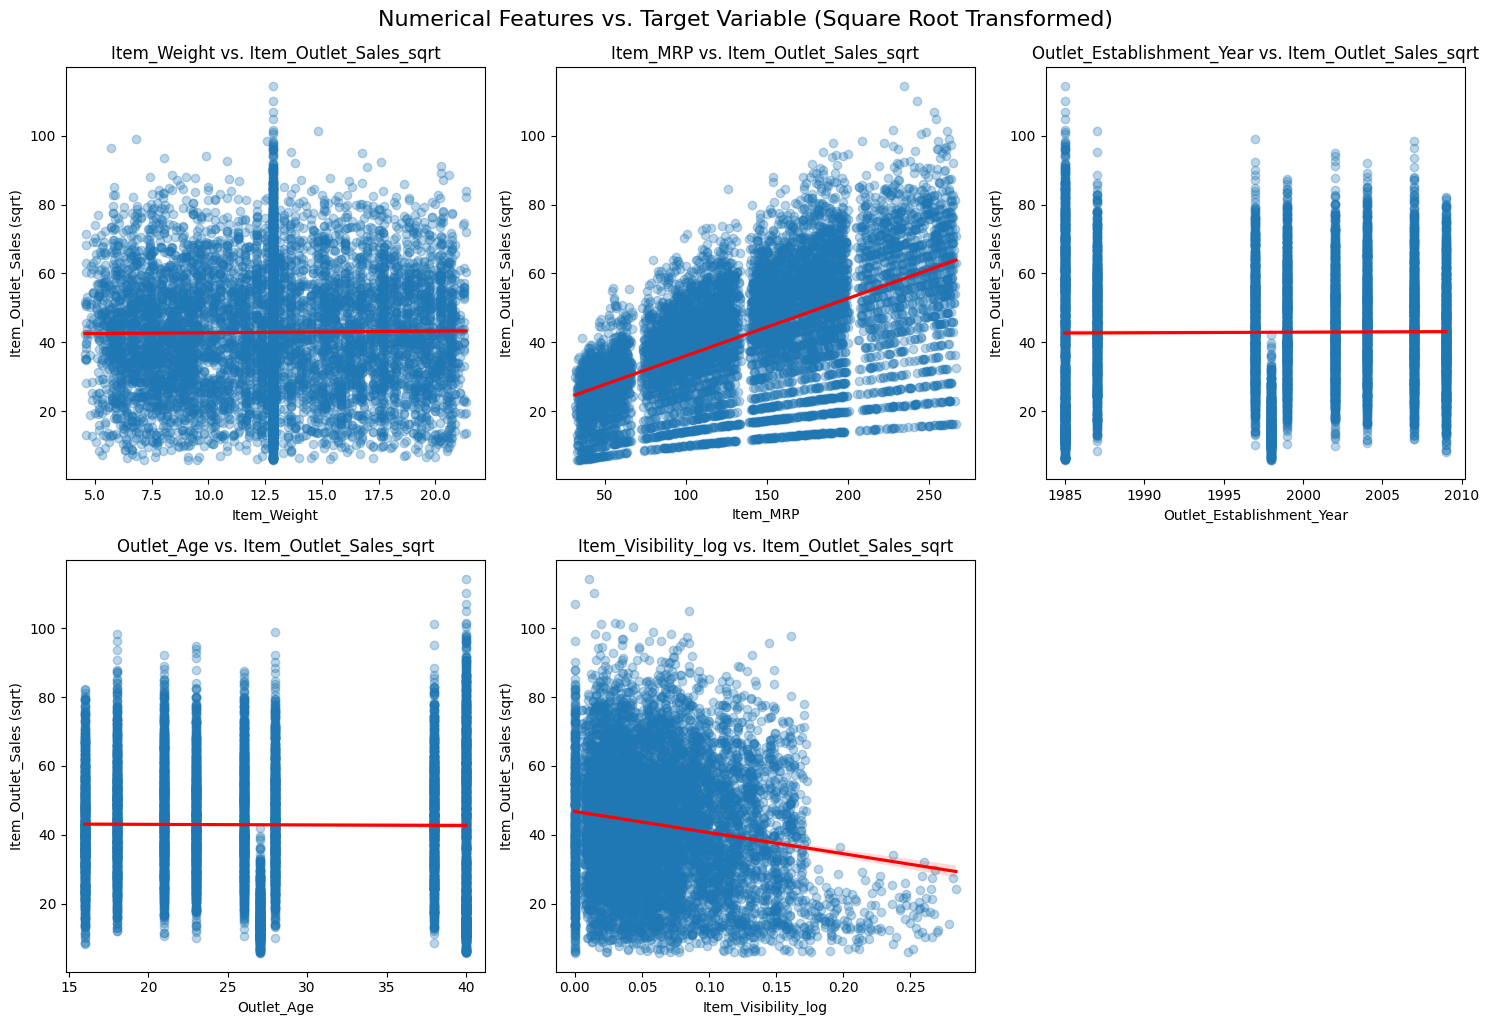

In [28]:
# Create scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=feature, y="Item_Outlet_Sales_sqrt", data=train, scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
    plt.title(f"{feature} vs. Item_Outlet_Sales_sqrt")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales (sqrt)")
plt.tight_layout()
plt.suptitle("Numerical Features vs. Target Variable (Square Root Transformed)", y=1.02, fontsize=16)
plt.show()

#### 4.2.2 Bivariate Analysis: Categorical Features vs. Target Variable (Item_Outlet_Sales_sqrt)

In [30]:
categorical_features = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_MRP_Category"]


--- Categorical Features vs. Item_Outlet_Sales_sqrt ---


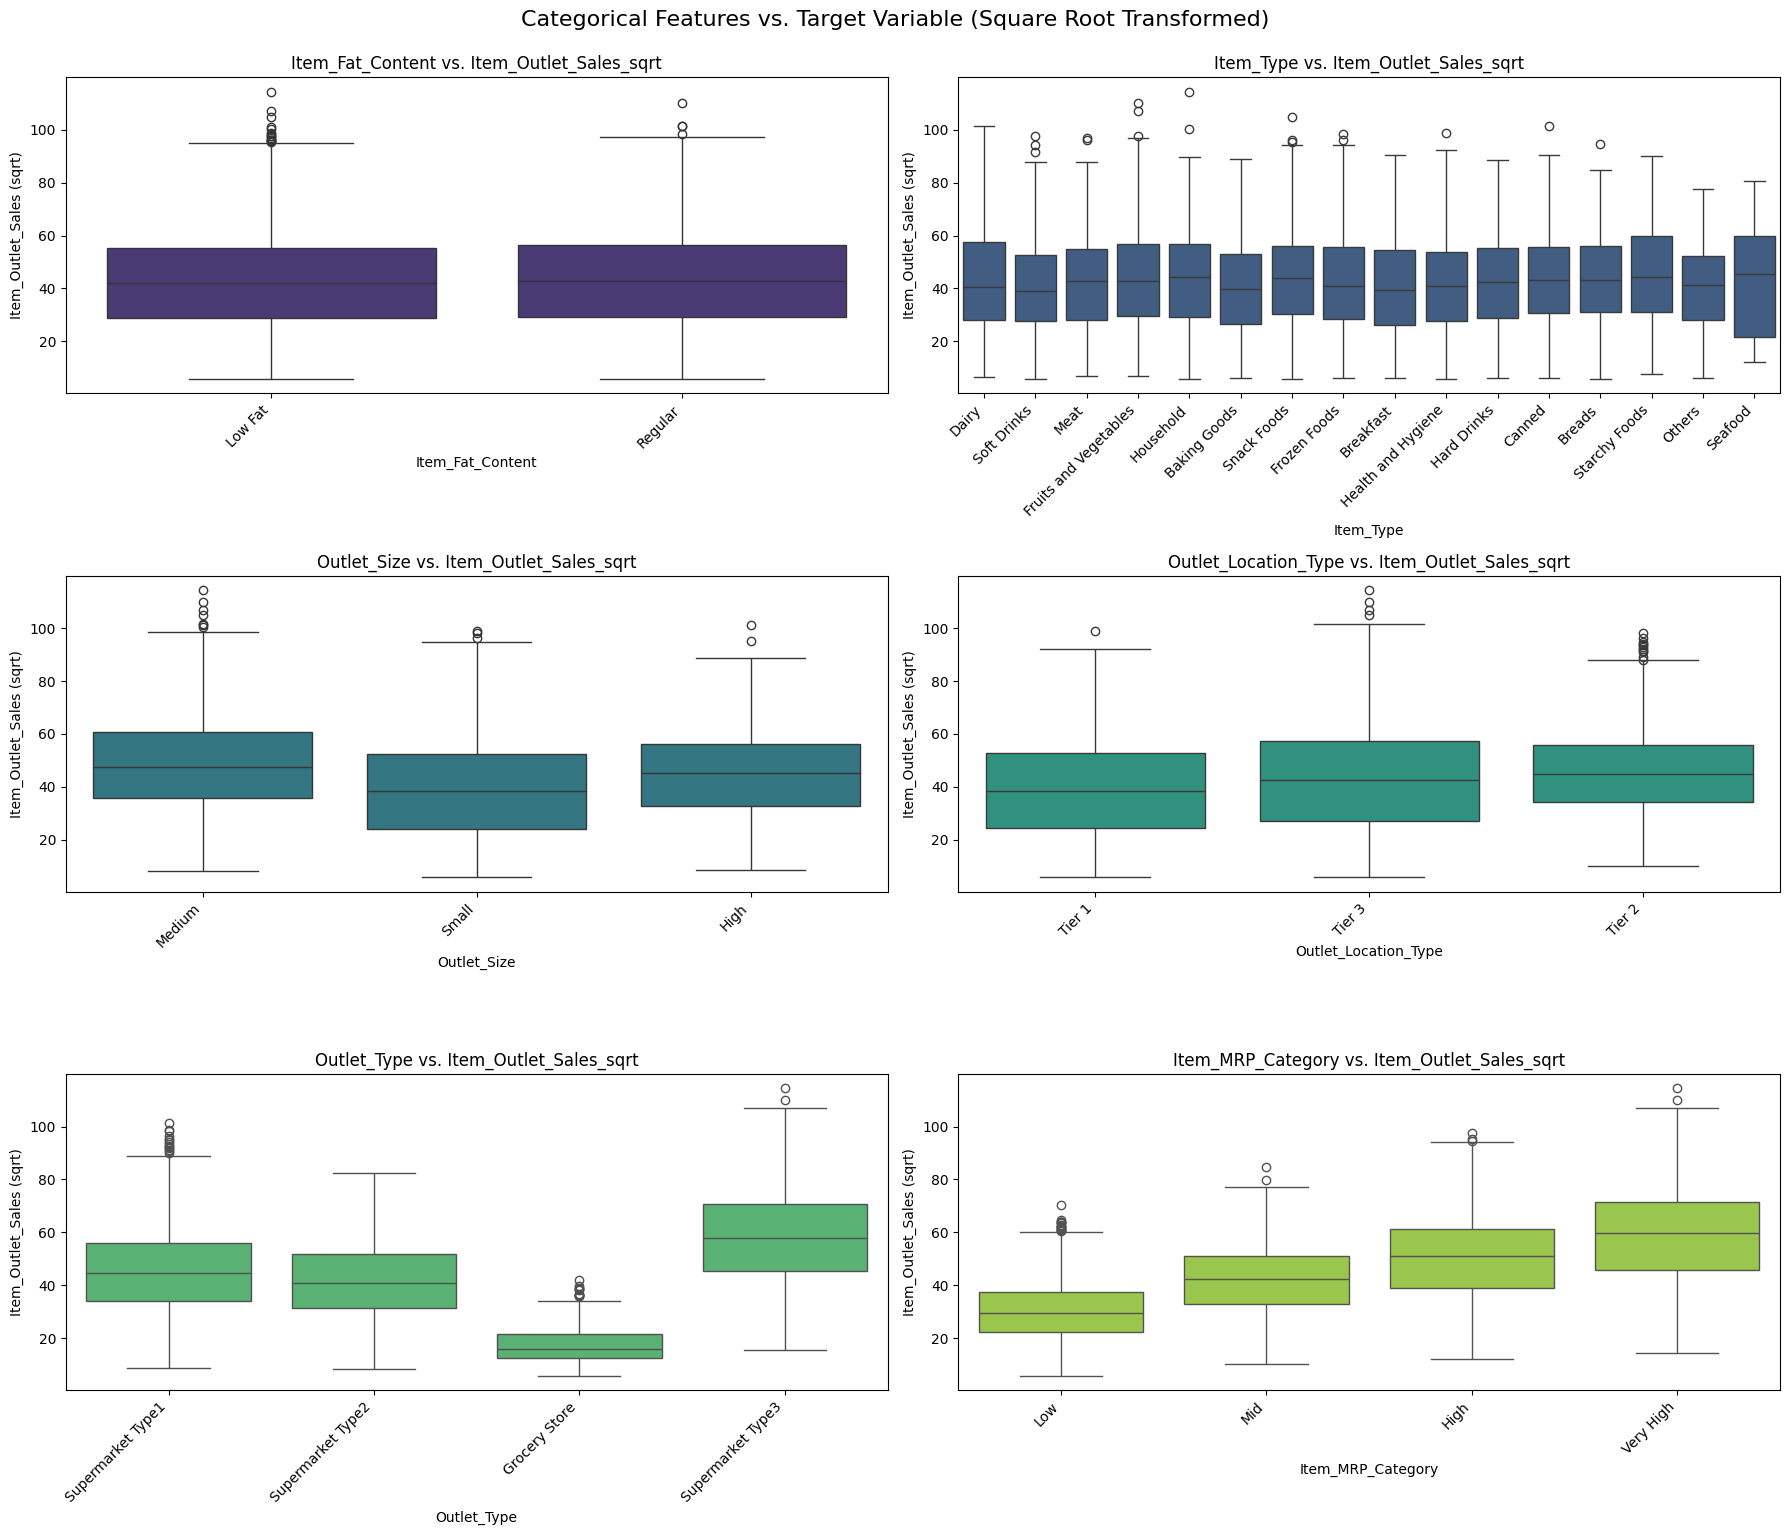

In [31]:
print("\n--- Categorical Features vs. Item_Outlet_Sales_sqrt ---")
colors = sns.color_palette("viridis", len(categorical_features))
# Create box plots for each categorical feature against the target variable
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=feature, y="Item_Outlet_Sales_sqrt", data=train, color=colors[i])
    plt.title(f"{feature} vs. Item_Outlet_Sales_sqrt")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales (sqrt)")
    plt.xticks(rotation=45, ha="right") # Rotate labels for better readability
plt.tight_layout()
plt.suptitle("Categorical Features vs. Target Variable (Square Root Transformed)", y=1.02, fontsize=16)
plt.show()


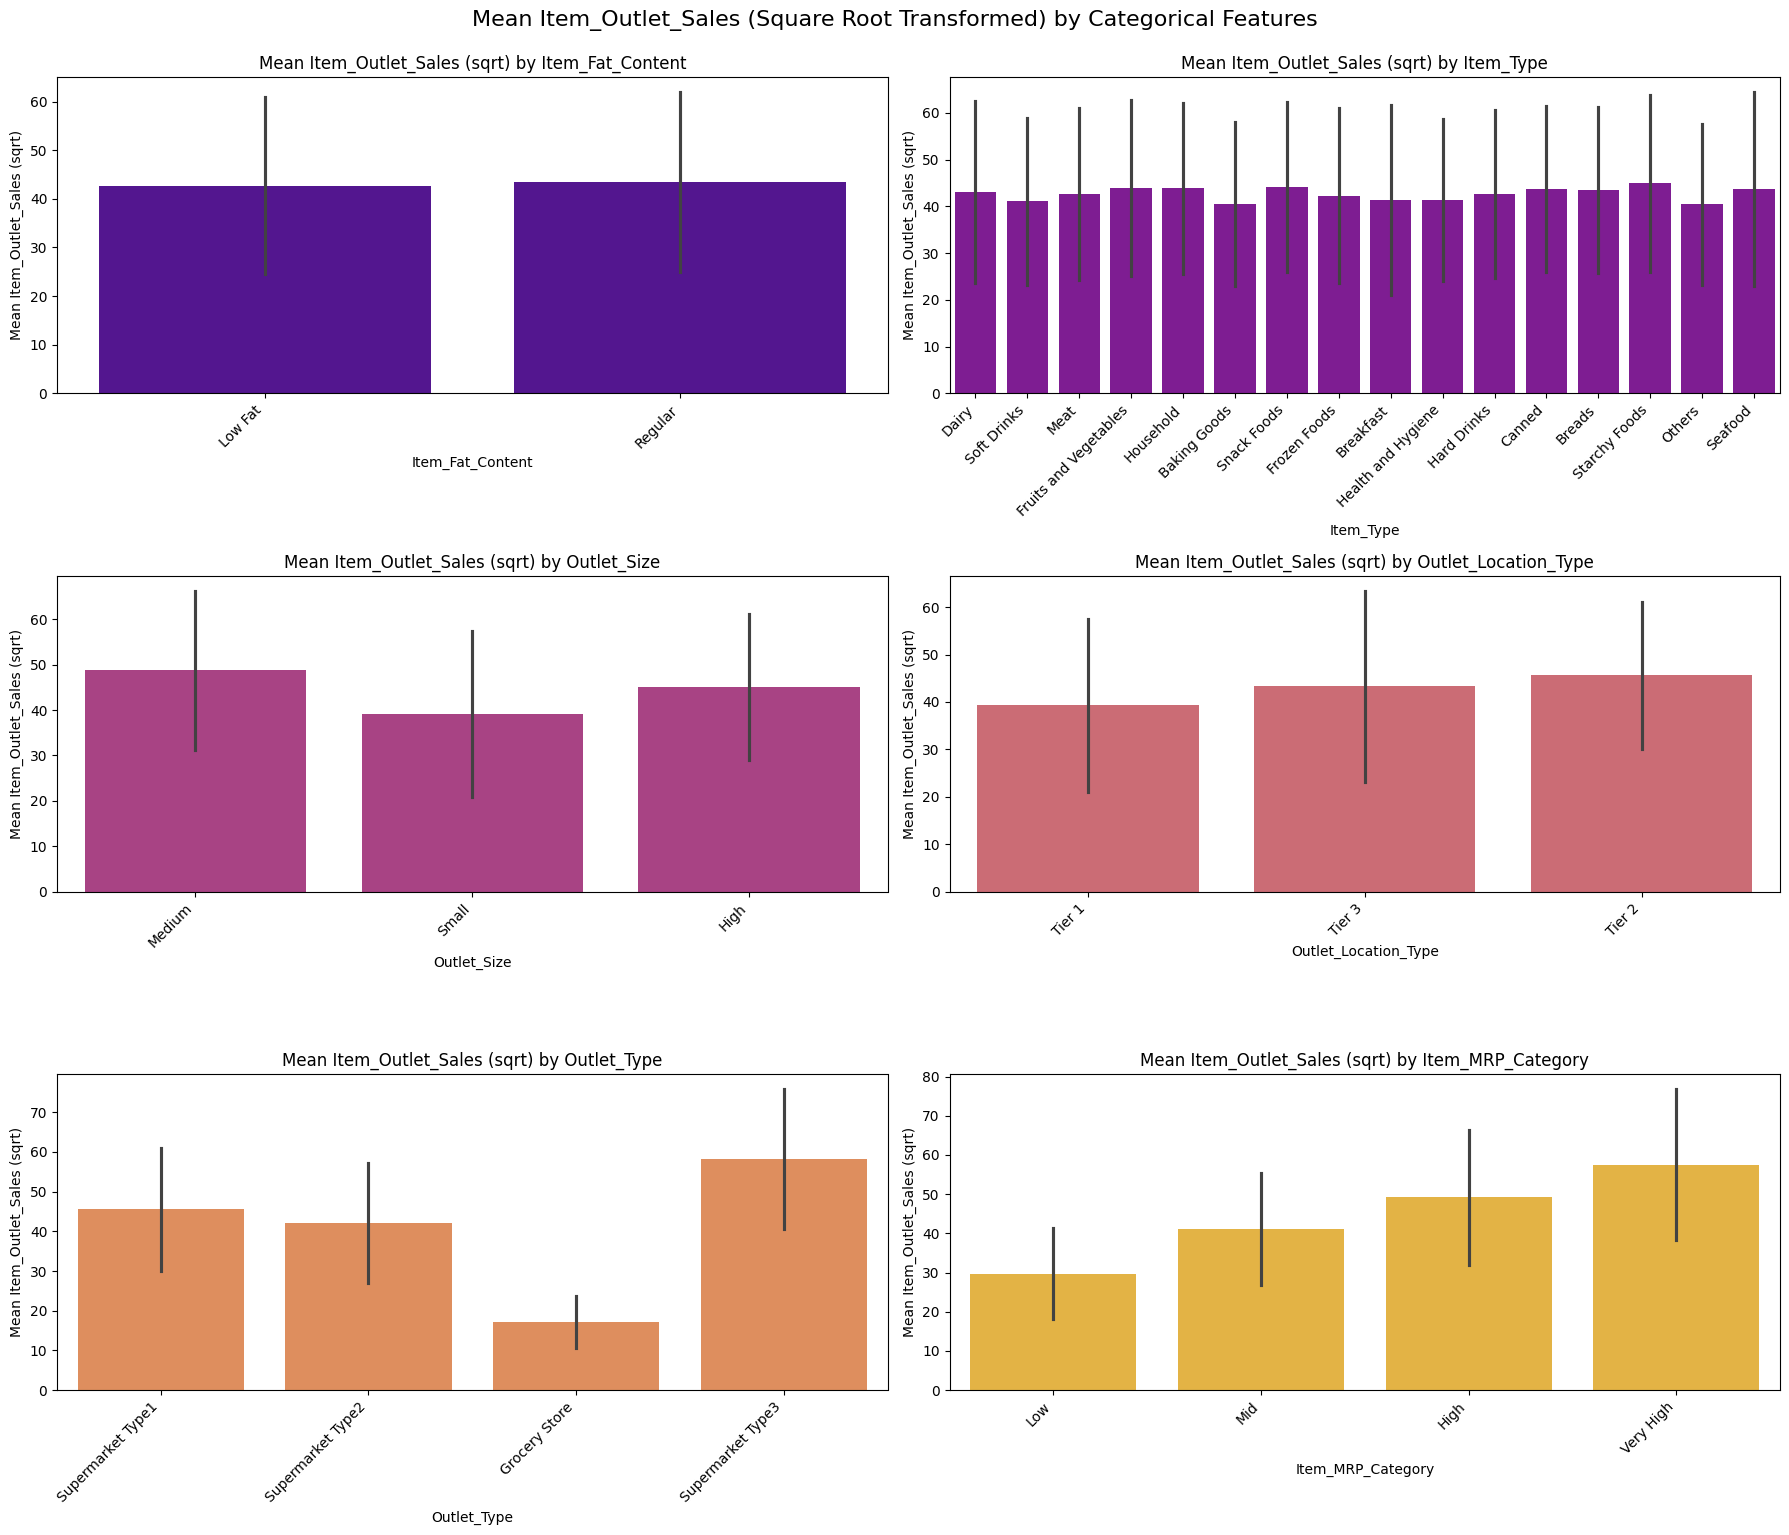

In [33]:
colors1 = sns.color_palette("plasma", len(categorical_features))
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    # Bar plot to show the mean of Item_Outlet_Sales_sqrt for each category
    sns.barplot(x=feature, y='Item_Outlet_Sales_sqrt', data=train, errorbar='sd', color=colors1[i]) # errorbar='sd' shows standard deviation
    plt.title(f'Mean Item_Outlet_Sales (sqrt) by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean Item_Outlet_Sales (sqrt)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.suptitle('Mean Item_Outlet_Sales (Square Root Transformed) by Categorical Features', y=1.02, fontsize=16)
plt.show()

### 4.3 Correlation Heatmap (with numerical features)

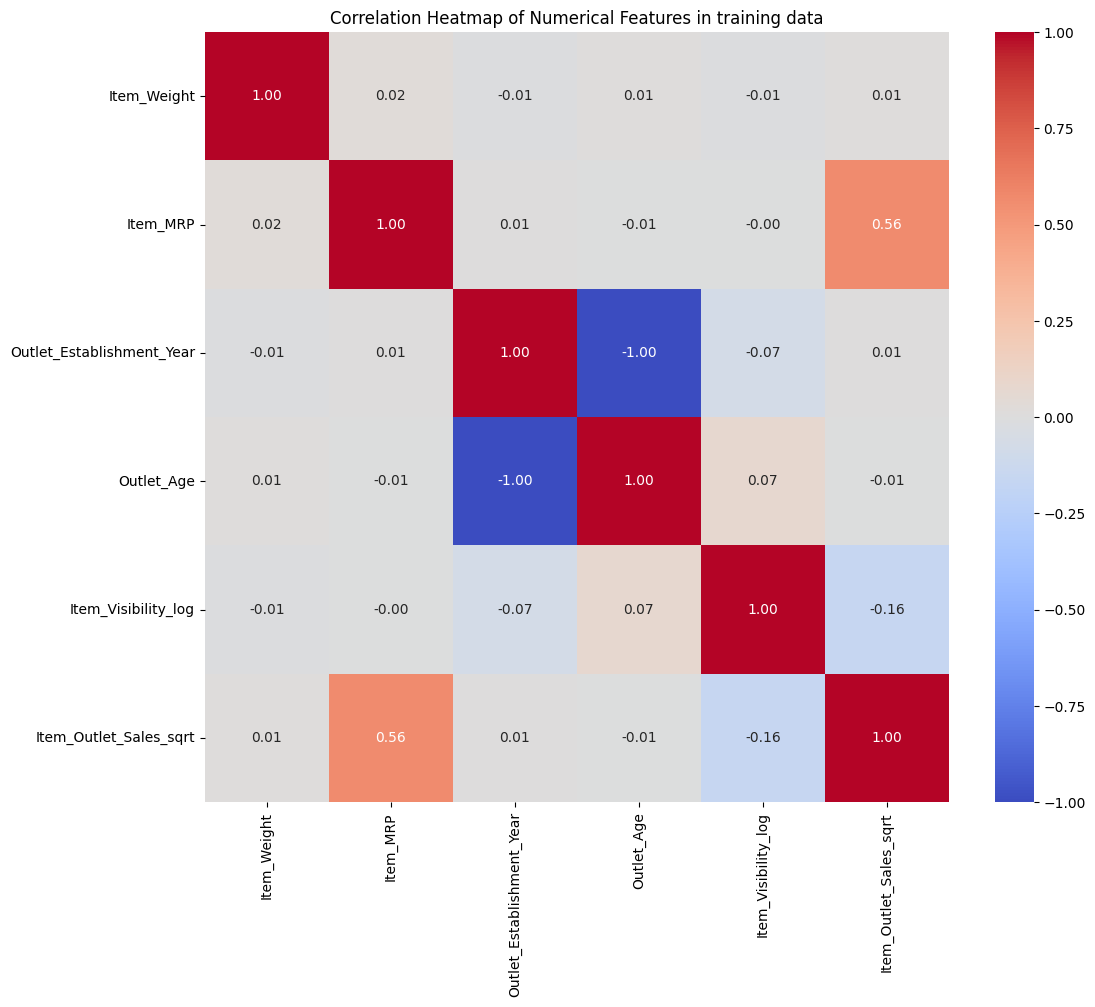

In [34]:
num_features = ["Item_Weight", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Age", "Item_Visibility_log", "Item_Outlet_Sales_sqrt"]
plt.figure(figsize=(12, 10))
sns.heatmap(train[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features in training data')
plt.show()

In [35]:
train[num_features].corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Visibility_log,Item_Outlet_Sales_sqrt
Item_Weight,1.000000,0.024756,-0.008301,0.008301,-0.012044,0.010869
Item_MRP,0.024756,1.000000,0.005020,-0.005020,-0.000701,0.563434
Outlet_Establishment_Year,-0.008301,0.005020,1.000000,-1.000000,-0.072349,0.007511
Outlet_Age,0.008301,-0.005020,-1.000000,1.000000,0.072349,-0.007511
Item_Visibility_log,-0.012044,-0.000701,-0.072349,0.072349,1.000000,-0.157754
Item_Outlet_Sales_sqrt,0.010869,0.563434,0.007511,-0.007511,-0.157754,1.000000


The correlation matrix provides clear evidence:

- `Item_MRP` is the most linearly impactful numerical feature on `Item_Outlet_Sales_sqrt` (target variable).

- `Item_Visibility_log` has a minor, negative linear impact.

- `Item_Weight` and `Outlet_Age` show negligible linear correlation with sales.

- Importantly, there's **no significant multicollinearity** among numerical independent features (their correlations with each other are all very close to zero). This is good for models that are sensitive to multicollinearity.

Model Selection based on Correlation Matrix:

- **For Linear Models (e.g., Linear Regression, Ridge, Lasso)**: Features with very low linear correlation and no clear non-linear patterns can sometimes be dropped to simplify the model, reduce noise, and potentially improve performance, but this is not a good idea.

- **For Tree-Based Models (e.g., Decision Tree, Random Forest, XGBoost)**: These models are generally robust to irrelevant features. They will effectively "ignore" features that don't contribute to improving prediction accuracy.

- **Conclusion:** We will use Random Forest Regressor and XGBoost Regressor to train the model.

## 5. Feature Encoding

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Outlet_Age                 8523 non-null   int64   
 13  Item_MRP_Category          8523 n

In [37]:
train.drop(["Item_Identifier", "Item_Visibility", "Outlet_Identifier", "Item_Outlet_Sales", "Item_Outlet_Sales_log",
            "Item_Visibility_sqrt"], axis=1, inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_MRP_Category,Item_Visibility_log,Item_Outlet_Sales_sqrt
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,26,Very High,0.015920,61.115775
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,16,Low,0.019095,21.057607
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,26,Mid,0.016621,45.795961
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,27,High,0.000000,27.062520
4,8.93,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,38,Low,0.000000,31.538947


In [38]:
# Ensure pandas knows Outlet_Establishment_Year is categorical for get_dummies
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'].astype(str)

categorical_features_for_encoding = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type",
                                     "Item_MRP_Category", "Outlet_Establishment_Year"]

In [39]:
# --- Perform One-Hot Encoding ---
df_encoded = pd.get_dummies(data=train, columns=categorical_features_for_encoding, drop_first=True, dtype=int)

# --- Display the shape of the new DataFrame ---
print(f"\nOriginal DataFrame shape: {train.shape}")
print(f"Encoded DataFrame shape: {df_encoded.shape}")

# --- Show the first few rows of the processed DataFrame ---
print("\nFirst 5 rows of the encoded DataFrame:")
df_encoded.head()


Original DataFrame shape: (8523, 12)
Encoded DataFrame shape: (8523, 39)

First 5 rows of the encoded DataFrame:


,Item_Weight,Item_MRP,Outlet_Age,Item_Visibility_log,Item_Outlet_Sales_sqrt,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_MRP_Category_High,Item_MRP_Category_Very High,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.30,249.8092,26,0.015920,61.115775,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,5.92,48.2692,16,0.019095,21.057607,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,141.6180,26,0.016621,45.795961,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,182.0950,27,0.000000,27.062520,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8.93,53.8614,38,0.000000,31.538947,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 6. Train-Test Split

In [40]:
# --- Separate Independent Features (X) and Target Feature (y) ---
X = df_encoded.drop("Item_Outlet_Sales_sqrt", axis=1)
y = df_encoded["Item_Outlet_Sales_sqrt"]
print(f"\nIndependent Features (X) shape: {X.shape}")
print(f"Target Feature (y) shape: {y.shape}")

# --- Split data into training and testing sets ---
# Using a common split of 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Independent Features (X) shape: (8523, 38)
Target Feature (y) shape: (8523,)

Data split into training and testing sets:
X_train shape: (6818, 38)
X_test shape: (1705, 38)
y_train shape: (6818,)
y_test shape: (1705,)


## 7. Modeling

### 7.1 Random Forest Model Training

In [41]:
# --- Train and Evaluate Random Forest Regressor ---
print("\n--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)


--- Training Random Forest Regressor ---


RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate performance
r2_train_rf = metrics.r2_score(y_train, y_train_pred_rf)
r2_test_rf = metrics.r2_score(y_test, y_test_pred_rf)

mae_train_rf = metrics.mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = metrics.mean_absolute_error(y_test, y_test_pred_rf)

mse_train_rf = metrics.mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = metrics.mean_squared_error(y_test, y_test_pred_rf)

rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print(f"Random Forest Regressor Performance:")
print(f"  R-squared: Training set = {r2_train_rf:.4f} and Testing set = {r2_test_rf:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_rf:.4f} and Testing set = {mae_test_rf:.4f}")
print(f"  Mean Squared Error (MSE): Training set = {mse_train_rf:.4f} and Testing set = {mse_test_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): Training set = {rmse_train_rf:.4f} and Testing set = {rmse_test_rf:.4f}")

Random Forest Regressor Performance:
  R-squared: Training set = 0.9488 and Testing set = 0.6504
  Mean Absolute Error (MAE): Training set = 3.1609 and Testing set = 8.2051
  Mean Squared Error (MSE): Training set = 17.3464 and Testing set = 114.9054
  Root Mean Squared Error (RMSE): Training set = 4.1649 and Testing set = 10.7194


#### **Random Forest Regressor Performance Analysis:**

- The Random Forest model performed exceptionally well on your training data (R-squared of 0.9488, very low errors). However, its performance dropped significantly on the unseen testing data (R-squared of 0.6504, much higher errors).

- **Conclusion:** The Random Forest Regressor is clearly overfitting.
It has learned the training data (including its noise and specific patterns) too well and is not generalizing effectively to new, unseen data.

In [43]:
# feature importances for Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances (Top 10):")
feature_importances_rf.head(10)


Random Forest Feature Importances (Top 10):


Item_MRP                           0.415234
Outlet_Establishment_Year_1998     0.144307
Outlet_Age                         0.144192
Item_Visibility_log                0.079450
Outlet_Type_Supermarket Type3      0.068540
Item_Weight                        0.048673
Item_Fat_Content_Regular           0.007243
Item_Type_Snack Foods              0.006395
Item_Type_Fruits and Vegetables    0.006253
Item_Type_Household                0.005233
dtype: float64

### 7.2 XGBoost Model Training

In [44]:
# --- Train XGBoost Regressor ---
print("\n--- Training XGBoost Regressor ---")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=SEED, n_jobs=-1)
xgb_model.fit(X_train, y_train)


--- Training XGBoost Regressor ---


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [45]:
# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
r2_train_xgb = metrics.r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = metrics.r2_score(y_test, y_test_pred_xgb)

mae_train_xgb = metrics.mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)

mse_train_xgb = metrics.mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = metrics.mean_squared_error(y_test, y_test_pred_xgb)

rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

print(f"XGBoost Regressor Performance:")
print(f"  R-squared: training set = {r2_train_xgb:.4f} and Testing set = {r2_test_xgb:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_xgb:.4f} and Testing set = {mae_test_xgb:.4f}")
print(f"  Mean Squared Error (MSE): Training set = {mse_train_xgb:.4f} and Testing set = {mse_test_xgb:.4f}")
print(f"  Root Mean Squared Error (RMSE):Training set = {rmse_train_xgb:.4f} and Testing set = {rmse_test_xgb:.4f}")

XGBoost Regressor Performance:
  R-squared: training set = 0.7691 and Testing set = 0.6731
  Mean Absolute Error (MAE): Training set = 6.7387 and Testing set = 7.9173
  Mean Squared Error (MSE): Training set = 78.2375 and Testing set = 107.4458
  Root Mean Squared Error (RMSE):Training set = 8.8452 and Testing set = 10.3656


#### **XGBoost Rgressor Performance Analysis:**

- The XGBoost model performs well on the training set (R-squared of 0.7691), and its performance on the testing set (R-squared of 0.6731) is quite close to its training performance. The errors also show a much smaller increase from training to testing compared to Random Forest.

- **Conclusion:** The XGBoost Regressor shows much less overfitting (or a healthy balance).
While there's a slight drop in performance from training to testing, it's a good indication that the model is generalizing much better than the Random Forest model.

In [46]:
# feature importances for XGBoost
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nXGBoost Feature Importances (Top 10):")
feature_importances_xgb.head(10)


XGBoost Feature Importances (Top 10):


Outlet_Establishment_Year_1998    0.456935
Outlet_Type_Supermarket Type3     0.176113
Outlet_Age                        0.109103
Item_MRP                          0.070556
Outlet_Type_Supermarket Type1     0.019371
Item_MRP_Category_High            0.009127
Item_Type_Hard Drinks             0.008010
Item_MRP_Category_Very High       0.006952
Item_Type_Starchy Foods           0.006721
Outlet_Establishment_Year_1987    0.006706
dtype: float32

#### **Comparison of Random Forest vs. XGBoost:**

- **XGBoost is performing better on the test set.** Its R-squared (0.6731) is higher than Random Forest's (0.6504), and its error metrics (MAE, MSE, RMSE) are all lower on the test set. This means XGBoost is better at predicting sales for new, unseen items and outlets.

- **XGBoost is much less overfit.** The gap between its training and testing performance is significantly smaller compared to the massive gap seen in Random Forest.

**Next Step:**

Based on the results, XGBoost Regressor is currently the better performing model due to its superior generalization capabilities and less overfitting. **The next step is to Focus on XGBoost Hyperparameter Tuning.**

### 7.3 XGBoost Regressor Hyperparameter Tuning

In [47]:
# --- XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
print("\n--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---")

# Define the parameter distributions to sample from
# Using continuous distributions for some parameters for better exploration
param_distributions = {
    'n_estimators': randint(100, 500), # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2), # Step size shrinkage
    'max_depth': randint(3, 7), # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4), # Subsample ratio of the training instance (from 0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree (from 0.6 to 1.0)
    'gamma': uniform(0, 0.2), # Minimum loss reduction required to make a further partition
    'reg_alpha': uniform(0, 0.1) # L1 regularization term on weights
}

# Initialize XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled. Trade-off between runtime and effectiveness.
# scoring: 'neg_root_mean_squared_error' is used to minimize RMSE.
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

print("\nRandomized Search completed.")
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation RMSE: {-random_search.best_score_:.4f}") # Negate back to get RMSE

# Get the best model from random search
best_xgb_model = random_search.best_estimator_


--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Randomized Search completed.
Best parameters found: {'colsample_bytree': np.float64(0.8289169876683353), 'gamma': np.float64(0.19606631674320915), 'learning_rate': np.float64(0.02506925120122564), 'max_depth': 3, 'n_estimators': 260, 'reg_alpha': np.float64(0.031692200515627766), 'subsample': np.float64(0.6677970986744369)}
Best cross-validation RMSE: 10.5527


In [48]:
# Evaluate the best model on the train and test set
y_train_pred_xgb_htp = best_xgb_model.predict(X_train)
y_test_pred_xgb_htp = best_xgb_model.predict(X_test)

r2_train_xgb_htp = metrics.r2_score(y_train, y_train_pred_xgb_htp)
r2_test_xgb_htp = metrics.r2_score(y_test, y_test_pred_xgb_htp)

mae_train_xgb_htp = metrics.mean_absolute_error(y_train, y_train_pred_xgb_htp)
mae_test_xgb_htp = metrics.mean_absolute_error(y_test, y_test_pred_xgb_htp)

rmse_train_xgb_htp = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb_htp))
rmse_test_xgb_htp = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb_htp))

print(f"\nHypertuned XGBoost Regressor Model Performance:")
print(f"  R-squared: Training set = {r2_train_xgb_htp:.4f} and Testing set = {r2_test_xgb_htp:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_xgb_htp:.4f} and Testing set = {mae_test_xgb_htp:.4f}")
print(f"  Root Mean Squared Error (RMSE): training set = {rmse_train_xgb_htp:.4f} and Testing set = {rmse_test_xgb_htp:.4f}")


Hypertuned XGBoost Regressor Model Performance:
  R-squared: Training set = 0.6866 and Testing set = 0.6880
  Mean Absolute Error (MAE): Training set = 7.9001 and Testing set = 7.7746
  Root Mean Squared Error (RMSE): training set = 10.3049 and Testing set = 10.1258


### 7.4 XGBoost Regressor Hyperparameter Tuning 2

In [49]:
# --- Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
print("\n--- Starting Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---")

# Define the refined parameter distributions based on best_params_ from previous run
param_distributions_refined = {
    'n_estimators': randint(240, 300), # Centered around 260, slightly wider
    'learning_rate': uniform(0.015, 0.02), # Centered around 0.025, from 0.015 to 0.035
    'max_depth': randint(3, 5), # Best was 3, let's explore 3 and 4
    'subsample': uniform(0.6, 0.1), # Centered around 0.6678, from 0.6 to 0.7
    'colsample_bytree': uniform(0.75, 0.15), # Centered around 0.8289, from 0.75 to 0.9
    'gamma': uniform(0.1, 0.2), # Centered around 0.196, from 0.1 to 0.3
    'reg_alpha': uniform(0.01, 0.04), # Centered around 0.031, from 0.01 to 0.05
    'reg_lambda': uniform(0.8, 0.4) # Exploring L2 regularization around default (1.0)
}

# Initialize XGBRegressor with some common default settings that might be good starting points
xgb1 = XGBRegressor(random_state=42, n_jobs=-1,
                   objective='reg:squarederror') # Specify objective for newer XGBoost versions

# Initialize RandomizedSearchCV
random_search_refined = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_distributions_refined,
    n_iter=150,             # Increased number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1              # Use all available CPU cores
)

# Fit the random search to the training data
random_search_refined.fit(X_train, y_train)

print("\nRefined Randomized Search completed.")
print(f"Best parameters found: {random_search_refined.best_params_}")
print(f"Best cross-validation RMSE: {-random_search_refined.best_score_:.4f}") # Negate back to get RMSE

# Get the best model from random search
best_xgb_model_refined = random_search_refined.best_estimator_



--- Starting Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Refined Randomized Search completed.
Best parameters found: {'colsample_bytree': np.float64(0.7814858389643379), 'gamma': np.float64(0.27961085788814277), 'learning_rate': np.float64(0.019102792809640144), 'max_depth': 3, 'n_estimators': 288, 'reg_alpha': np.float64(0.011461986713923795), 'reg_lambda': np.float64(0.9888267780439998), 'subsample': np.float64(0.6564841133262617)}
Best cross-validation RMSE: 10.5469


In [50]:
# Evaluate the refined xgboost model on the train and test set
y_train_pred_xgb_htp2 = best_xgb_model_refined.predict(X_train)
y_test_pred_xgb_htp2 = best_xgb_model_refined.predict(X_test)

r2_train_xgb_htp2 = metrics.r2_score(y_train, y_train_pred_xgb_htp2)
r2_test_xgb_htp2 = metrics.r2_score(y_test, y_test_pred_xgb_htp2)

mae_train_xgb_htp2 = metrics.mean_absolute_error(y_train, y_train_pred_xgb_htp2)
mae_test_xgb_htp2 = metrics.mean_absolute_error(y_test, y_test_pred_xgb_htp2)

rmse_train_xgb_htp2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb_htp2))
rmse_test_xgb_htp2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb_htp2))

print(f"\nRefined Hypertuned XGBoost Regressor Model Performance:")
print(f"  R-squared: Training set = {r2_train_xgb_htp2:.4f} and Testing set = {r2_test_xgb_htp2:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_xgb_htp2:.4f} and Testing set = {mae_test_xgb_htp2:.4f}")
print(f"  Root Mean Squared Error (RMSE): training set = {rmse_train_xgb_htp2:.4f} and Testing set = {rmse_test_xgb_htp2:.4f}")


Refined Hypertuned XGBoost Regressor Model Performance:
  R-squared: Training set = 0.6835 and Testing set = 0.6881
  Mean Absolute Error (MAE): Training set = 7.9428 and Testing set = 7.7784
  Root Mean Squared Error (RMSE): training set = 10.3558 and Testing set = 10.1248


#### **Analysis of Hypertuned XGBoost Regressor and Refined Hypertuned XGBoost Regressor:**

- The most important takeaway is that the model remains extremely stable and well-generalized. The training and testing R-squared values are practically identical (and test R-squared is still slightly higher), indicating no overfitting and robust performance on unseen data.

- The Refined hyperparameter tuning yielded practically no improvement in test set performance. The R-squared decreased by a tiny fraction, and MAE/RMSE increased by an equally tiny fraction. This suggests that we have likely found a very good set of hyperparameters within the current feature set, and further tuning in this space may offer little to no additional benefit. We're very close to the optimal performance ceiling for the model with the existing features.

- **What Does This Mean for Improving Performance Further?:**
Since we've thoroughly tuned the XGBoost model and achieved a stable, well-generalized performance, the primary avenue for significant further improvement (increasing R-squared and reducing errors) will likely come from Feature Engineering. This involves:

  - Creating new features from existing ones (e.g., interaction terms).
  - Deriving more insightful categorical or numerical representations.
  - Potentially acquiring or integrating external data if available.




## 8. New Feature Engineering

#### **Following New Features to Create from Existing Features:**

1. **Interaction Features:** These capture how the effect of one feature changes depending on the value of another.

      - `Item_MRP_Category_Outlet_Type_Interaction`: The selling price strategy (`Item_MRP_Category`) might have a different impact on sales depending on the Outlet_Type (e.g., high-priced items might sell well in supermarkets but poorly in grocery stores).
      - `Outlet_Age_Outlet_Type_Interaction`: Older stores of a certain type might have established customer bases, or conversely, newer stores might have modern appeal.
      - `Item_Visibility_MRP_Interaction`: Interaction between visibility and price, as consumers might tolerate lower visibility for very low or very high-priced items.

2. **Aggregated Features (Per-Item and Per-Outlet):** These features capture collective characteristics that individual features might miss.

      - `Outlet_Type_Mean_MRP`: The average MRP of items sold at each Outlet_Type. This could indicate the general price level or customer segment associated with that outlet type.
      - `Item_Type_Average_MRP`: The average MRP for each Item_Type.

In [51]:
# Interaction Feature 1: Item_MRP_Category and Outlet_Type (categorical interaction)
train['Item_MRP_Category_Outlet_Type_Interaction'] = train['Item_MRP_Category'].astype(str) + '_' + train['Outlet_Type'].astype(str)

# Interaction Feature 2: Outlet_Age and Outlet_Type (numerical interaction)
# Convert Outlet_Age to numerical for multiplication
train['Outlet_Age_Outlet_Type_Interaction'] = train['Outlet_Age'] * train['Outlet_Type'].factorize()[0] # Using factorize for numerical conversion

# Interaction Feature 3: Item_Visibility_log and Item_MRP
train['Item_Visibility_MRP_Interaction'] = train['Item_Visibility_log'] * train['Item_MRP']

# Aggregated Feature 1: Mean Item_MRP by Outlet_Type
train['Outlet_Type_Mean_MRP'] = train.groupby('Outlet_Type')['Item_MRP'].transform('mean')

# Aggregated Feature 2: Mean Item_MRP by Item_Type
train['Item_Type_Mean_MRP'] = train.groupby('Item_Type')['Item_MRP'].transform('mean')

print("New Feature Engineering complete.")


New Feature Engineering complete.


In [52]:
print("\n--- train data after New Feature Engineering ---")
print(train.shape)
train.head()


--- train data after New Feature Engineering ---
(8523, 17)


,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_MRP_Category,Item_Visibility_log,Item_Outlet_Sales_sqrt,Item_MRP_Category_Outlet_Type_Interaction,Outlet_Age_Outlet_Type_Interaction,Item_Visibility_MRP_Interaction,Outlet_Type_Mean_MRP,Item_Type_Mean_MRP
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,26,Very High,0.015920,61.115775,Very High_Supermarket Type1,0,3.976939,141.213894,148.499208
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,16,Low,0.019095,21.057607,Low_Supermarket Type2,16,0.921688,141.678634,131.492506
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,26,Mid,0.016621,45.795961,Mid_Supermarket Type1,0,2.353858,141.213894,139.882032
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,27,High,0.000000,27.062520,High_Grocery Store,54,0.000000,140.294688,144.581235
4,8.93,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,38,Low,0.000000,31.538947,Low_Supermarket Type1,0,0.000000,141.213894,149.424753


## 9. New Feature Encoding

In [53]:
new_categorical_features_for_encoding = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
    'Item_MRP_Category',
    'Outlet_Establishment_Year',
    'Item_MRP_Category_Outlet_Type_Interaction' # Newly created categorical interaction
]

In [54]:
# Perform One-Hot Encoding
new_df_encoded = pd.get_dummies(train, columns=new_categorical_features_for_encoding, drop_first=True, dtype=int)

print("Feature encoding complete.")
print(f"Encoded DataFrame shape: {new_df_encoded.shape}")

Feature encoding complete.
Encoded DataFrame shape: (8523, 58)


In [55]:
new_df_encoded.head()

,Item_Weight,Item_MRP,Outlet_Age,Item_Visibility_log,Item_Outlet_Sales_sqrt,Outlet_Age_Outlet_Type_Interaction,Item_Visibility_MRP_Interaction,Outlet_Type_Mean_MRP,Item_Type_Mean_MRP,Item_Fat_Content_Regular,...,Item_MRP_Category_Outlet_Type_Interaction_Low_Supermarket Type2,Item_MRP_Category_Outlet_Type_Interaction_Low_Supermarket Type3,Item_MRP_Category_Outlet_Type_Interaction_Mid_Grocery Store,Item_MRP_Category_Outlet_Type_Interaction_Mid_Supermarket Type1,Item_MRP_Category_Outlet_Type_Interaction_Mid_Supermarket Type2,Item_MRP_Category_Outlet_Type_Interaction_Mid_Supermarket Type3,Item_MRP_Category_Outlet_Type_Interaction_Very High_Grocery Store,Item_MRP_Category_Outlet_Type_Interaction_Very High_Supermarket Type1,Item_MRP_Category_Outlet_Type_Interaction_Very High_Supermarket Type2,Item_MRP_Category_Outlet_Type_Interaction_Very High_Supermarket Type3
0,9.30,249.8092,26,0.015920,61.115775,0,3.976939,141.213894,148.499208,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,48.2692,16,0.019095,21.057607,16,0.921688,141.678634,131.492506,1,...,1,0,0,0,0,0,0,0,0,0
2,17.50,141.6180,26,0.016621,45.795961,0,2.353858,141.213894,139.882032,0,...,0,0,0,1,0,0,0,0,0,0
3,19.20,182.0950,27,0.000000,27.062520,54,0.000000,140.294688,144.581235,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,53.8614,38,0.000000,31.538947,0,0.000000,141.213894,149.424753,0,...,0,0,0,0,0,0,0,0,0,0


## 10. New Train-Test Split

In [56]:
# --- Separate Features (X) and Target (y) ---
new_X = new_df_encoded.drop('Item_Outlet_Sales_sqrt', axis=1)
new_y = new_df_encoded['Item_Outlet_Sales_sqrt']
print(f"\nFeatures (X) shape: {new_X.shape}")
print(f"Target (y) shape: {new_y.shape}")

# --- Split data into training and testing sets ---
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=SEED)
print(f"\nData split into training and testing sets:")
print(f"X_train shape: {new_X_train.shape}")
print(f"X_test shape: {new_X_test.shape}")
print(f"y_train shape: {new_y_train.shape}")
print(f"y_test shape: {new_y_test.shape}")


Features (X) shape: (8523, 57)
Target (y) shape: (8523,)

Data split into training and testing sets:
X_train shape: (6818, 57)
X_test shape: (1705, 57)
y_train shape: (6818,)
y_test shape: (1705,)


## 11. XGBoost Model Training with New Features

In [57]:
# --- Re-evaluate Best XGBoost Model with New Features ---
print("\n--- Evaluating Best XGBoost Model with New Features ---")

# Best parameters found from previous run (from XGBoost Regressor Hyperparameter Tuning)
best_params_from_previous_run = {
    'colsample_bytree': 0.8289169876683353,
    'gamma': 0.19606631674320915,
    'learning_rate': 0.02506925120122564,
    'max_depth': 3,
    'n_estimators': 260,
    'reg_alpha': 0.031692200515627766,
    'subsample': 0.6677970986744369
}

# Initialize XGBRegressor with the best parameters
xgb_model_with_new_features = XGBRegressor(random_state=SEED, n_jobs=-1,
                                            objective='reg:squarederror',
                                            **best_params_from_previous_run)

# Fit the model to the training data
xgb_model_with_new_features.fit(new_X_train, new_y_train)


--- Evaluating Best XGBoost Model with New Features ---


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8289169876683353, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.19606631674320915, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02506925120122564,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=260, n_jobs=-1,
             num_parallel_tree=None, ...)

In [58]:
# Make predictions on the test set
y_train_pred_xgb_new_features = xgb_model_with_new_features.predict(new_X_train)
y_test_pred_xgb_new_features = xgb_model_with_new_features.predict(new_X_test)

# Evaluate performance
r2_train_xgb_new_features = metrics.r2_score(new_y_train, y_train_pred_xgb_new_features)
r2_test_xgb_new_features = metrics.r2_score(new_y_test, y_test_pred_xgb_new_features)

mae_train_xgb_new_features = metrics.mean_absolute_error(new_y_train, y_train_pred_xgb_new_features)
mae_test_xgb_new_features = metrics.mean_absolute_error(new_y_test, y_test_pred_xgb_new_features)

rmse_train_xgb_new_features = np.sqrt(metrics.mean_squared_error(new_y_train, y_train_pred_xgb_new_features))
rmse_test_xgb_new_features = np.sqrt(metrics.mean_squared_error(new_y_test, y_test_pred_xgb_new_features))

print(f"\nXGBoost Model Performance on Test Set (with New Features):")
print(f"  R-squared: Training set = {r2_train_xgb_new_features:.4f} and Testing set = {r2_test_xgb_new_features:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_xgb_new_features:.4f} and Testing set = {mae_test_xgb_new_features:.4f}")
print(f"  Root Mean Squared Error (RMSE): Training set = {rmse_train_xgb_new_features:.4f} and Testing set = {rmse_test_xgb_new_features:.4f}")


XGBoost Model Performance on Test Set (with New Features):
  R-squared: Training set = 0.6855 and Testing set = 0.6859
  Mean Absolute Error (MAE): Training set = 7.9243 and Testing set = 7.8172
  Root Mean Squared Error (RMSE): Training set = 10.3237 and Testing set = 10.1596


#### **Conclusion on New Features:**
Unfortunately, the set of new features introduced in this round did not lead to an improvement in the model's predictive performance on the test set. In fact, there's a very slight, almost negligible, drop in R-squared and a slight increase in errors.

This can happen for several reasons:

- The new features might not be adding significant new information that the model can leverage.
- They might be highly correlated with existing features, leading to redundancy.
- They might be introducing some noise or complexity without a clear predictive signal for this particular task.

For Further improvent our next big step is an Advanced Ensemble method specifically stacking.

**What is Stacking?**

Stacking involves training multiple "base models" (also called level-0 models) on training data. Then, a "meta-model" (or level-1 model) is trained on the predictions of these base models. The meta-model learns how to best combine the diverse predictions of the base models to make the final output.

## 12. Model Training with Stacking (Advanced Ensemble Method)

#### **Strategy:**
We will create a stacked ensemble with:

- **Base Models (Level-0):**
    - Our well-tuned **XGBoost Regressor** (using the best parameters that gave the 0.6880 R-squared).
    - A **Random Forest Regressor** (a robust, different type of tree-based ensemble).
    - A **Ridge Regressor** (a simple, linear model to add diversity).
    - A **LightGBM Regressor** (another highly efficient and often high-performing gradient boosting library, providing an alternative to XGBoost's boosting approach).


- **Meta-Model (Level-1):**
    - A **Ridge Regressor** (simpler models are often preferred here, as their job is to weigh the base predictions, not to learn complex patterns from raw features).

**Important Note on Data:** Since our last set of feature engineering didn't yield an improvement, we will revert to the feature set that gave the best R-squared of 0.6880. This means we will use the data after the initial preprocessing and encoding, but before the interaction and aggregated features from our last step were added.


In [61]:
# --- Define Base Models and Meta-Model for Stacking ---
print("\n--- Setting up Stacking Regressor ---")

# Best parameters found from previous run for XGBoost
best_xgb_params = {
    'colsample_bytree': 0.8289169876683353,
    'gamma': 0.19606631674320915,
    'learning_rate': 0.02506925120122564,
    'max_depth': 3,
    'n_estimators': 260,
    'reg_alpha': 0.031692200515627766,
    'subsample': 0.6677970986744369
}

# Base Models
estimators = [
    ('xgb', XGBRegressor(random_state=SEED, n_jobs=-1, objective='reg:squarederror', **best_xgb_params)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=SEED, n_jobs=-1, max_depth=10, min_samples_leaf=5)), # Reasonable RF params to avoid severe overfitting
    ('ridge', Ridge(random_state=SEED)),
    ('lgbm', LGBMRegressor(random_state=SEED, n_jobs=-1)) # LightGBM with default params (can be tuned later)
]

# Meta-Model (final regressor)
final_estimator = Ridge(random_state=42)

# Create the Stacking Regressor
# n_jobs=-1 is not directly supported by StackingRegressor itself due to internal CV,
# but base estimators can use it.
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for training base models for meta-model input
    n_jobs=-1 # This will apply to the base estimators where supported
)

# --- Train the Stacked Model ---
print("\n--- Training Stacked Regressor Model ---")
stacked_model.fit(X_train, y_train)



--- Setting up Stacking Regressor ---

--- Training Stacked Regressor Model ---


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8289169876683353,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None,
                                            gamma=0.19606631674320915,
                                            grow_policy=None,
                                            import...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=260, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=5,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ridge', Ridge(random_state=42)),
                              ('lgbm',
                               LGBMRegressor(n_jobs=-1, random_state=42))],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

In [62]:
# --- Evaluate the Stacked Model ---
print("\n--- Evaluating Stacked Regressor Model ---")
y_train_pred_stacked = stacked_model.predict(X_train)
y_test_pred_stacked = stacked_model.predict(X_test)

r2_stacked_train = metrics.r2_score(y_train, y_train_pred_stacked)
r2_stacked_test = metrics.r2_score(y_test, y_test_pred_stacked)

mae_stacked_train = metrics.mean_absolute_error(y_train, y_train_pred_stacked)
mae_stacked_test = metrics.mean_absolute_error(y_test, y_test_pred_stacked)

rmse_stacked_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_stacked))
rmse_stacked_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_stacked))

print(f"\nStacked Regressor Model Performance on Train and Test Set:")
print(f"  R-squared: Train set = {r2_stacked_train:.4f} and Test set = {r2_stacked_test:.4f}")
print(f"  Mean Absolute Error (MAE): Test set = {mae_stacked_train:.4f} and Test set = {mae_stacked_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Test set = {rmse_stacked_train:.4f} and Test set = {rmse_stacked_test:.4f}")


--- Evaluating Stacked Regressor Model ---

Stacked Regressor Model Performance on Train and Test Set:
  R-squared: Train set = 0.6860 and Test set = 0.6899
  Mean Absolute Error (MAE): Test set = 7.8767 and Test set = 7.7346
  Root Mean Squared Error (RMSE): Test set = 10.3153 and Test set = 10.0946


#### **Analysis:**

- **Consistent Improvement:** All three key evaluation metrics (R-squared, MAE, RMSE) have shown a positive trend on the test set. While the improvements are incremental, they are consistent across the board. This indicates that combining the diverse strengths of your base models (XGBoost, Random Forest, Ridge, LightGBM) has successfully squeezed out a bit more predictive power.
  
- **Maintained Generalization:** Crucially, the R-squared values for the training (0.6860) and test (0.6899) sets remain extremely close. This confirms that the stacked model is not overfitting and continues to generalize very well to unseen data.

#### **Conclusion:**

Implementing the Stacked Regressor has successfully pushed the model's performance slightly higher, achieving the goal of improving R-squared and minimizing errors further. This demonstrates the power of ensemble learning.

Our next and Final step is the hypertuning the base models within Stack. We already have well-tuned parameters for XGBoost model. Let's focus on tuning the LightGBM Regressor (LGBM) and the Random Forest Regressor (RF), as they are powerful models whose performance can vary significantly with tuning. We'll stick with Ridge's default parameters for now, as it's less sensitive to complex tuning.

## 13. Stacked Regressor Hyperparameter Tuning

### 13.1 LightGBM Rgressor Hyperparameter Tuning

In [63]:
# --- LightGBM Hyperparameter Tuning ---
print("\n--- Starting LightGBM Hyperparameter Tuning with RandomizedSearchCV ---")

# Define parameter distributions for LightGBM
param_distributions_lgbm = {
    'n_estimators': randint(100, 500), # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2), # Step size shrinkage
    'num_leaves': randint(20, 60), # Max number of leaves in one tree (main complexity parameter)
    'max_depth': randint(3, 10), # Max tree depth, -1 means no limit
    'min_child_samples': randint(20, 100), # Min number of data needed in a child (leaf)
    'subsample': uniform(0.7, 0.3), # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.7, 0.3), # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.1), # L1 regularization
    'reg_lambda': uniform(0, 0.1) # L2 regularization
}

lgbm = LGBMRegressor(random_state=SEED, n_jobs=-1, objective='regression') # Explicitly setting objective

# Initialize RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions_lgbm,
    n_iter=100,             # Number of random combinations to try (can increase if resources allow)
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search_lgbm.fit(X_train, y_train)

print("\nLightGBM Randomized Search completed.")
print(f"Best parameters for LightGBM: {random_search_lgbm.best_params_}")
print(f"Best cross-validation RMSE for LightGBM: {-random_search_lgbm.best_score_:.4f}")

# Evaluate the best LightGBM model
best_lgbm_model = random_search_lgbm.best_estimator_
print(f"Best LGBM Params are: {best_lgbm_model}")


--- Starting LightGBM Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 37
[LightGBM] [Info] Start training from score 43.168033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [66]:
# Evaluate the best LightGBM model
y_train_pred_lgbm = best_lgbm_model.predict(X_train)
y_test_pred_lgbm = best_lgbm_model.predict(X_test)

r2_lgbm_train = metrics.r2_score(y_train, y_train_pred_lgbm)
r2_lgbm_test = metrics.r2_score(y_test, y_test_pred_lgbm)

mae_lgbm_train = metrics.mean_absolute_error(y_train, y_train_pred_lgbm)
mae_lgbm_test = metrics.mean_absolute_error(y_test, y_test_pred_lgbm)

rmse_lgbm_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lgbm))
rmse_lgbm_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lgbm))

print(f"\nBest LightGBM Model Performance on Test Set:")
print(f"  R-squared: Train set {r2_lgbm_train:.4f} and Test set = {r2_lgbm_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_lgbm_train:.4f} and Test set = {mae_lgbm_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_lgbm_train:.4f} and Test set = {rmse_lgbm_test:.4f}")


Best LightGBM Model Performance on Test Set:
  R-squared: Train set 0.6820 and Test set = 0.6902
  Mean Absolute Error (MAE): Train set = 7.9475 and Test set = 7.7517
  Root Mean Squared Error (RMSE): Train set = 10.3818 and Test set = 10.0905


### 13.2 Random Forest Regressor Hyperparameter Tuning

In [68]:
# Define parameter distributions for Random Forest
param_distributions_rf = {
    'n_estimators': randint(100, 500), # Number of trees
    'max_depth': randint(5, 20), # Max depth of individual trees
    'min_samples_split': randint(2, 10), # Min samples required to split an internal node
    'min_samples_leaf': randint(1, 5), # Min samples required to be at a leaf node
    'max_features': uniform(0.6, 0.4), # Number of features to consider when looking for the best split (from 0.6 to 1.0)
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

rf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=100,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search_rf.fit(X_train, y_train)

print("\nRandom Forest Randomized Search completed.")
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best cross-validation RMSE for Random Forest: {-random_search_rf.best_score_:.4f}")

# Best Random Forest model
best_rf_model = random_search_rf.best_estimator_
print(f"\nBest Random Forest Regressor Model: {best_rf_model}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Random Forest Randomized Search completed.
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 7, 'max_features': np.float64(0.6478376983753207), 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 356}
Best cross-validation RMSE for Random Forest: 10.5818

Best Random Forest Regressor Model: RandomForestRegressor(max_depth=7, max_features=np.float64(0.6478376983753207),
                      min_samples_leaf=2, min_samples_split=4, n_estimators=356,
                      n_jobs=-1, random_state=42)


In [71]:
# Evaluate the best Random Forest model
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

r2_rf_train = metrics.r2_score(y_train, y_train_pred_rf)
r2_rf_test = metrics.r2_score(y_test, y_test_pred_rf)

mae_rf_train = metrics.mean_absolute_error(y_train, y_train_pred_rf)
mae_rf_test = metrics.mean_absolute_error(y_test, y_test_pred_rf)

rmse_rf_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf))
rmse_rf_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))

print(f"\nBest Random Forest Model Performance on Test Set:")
print(f"  R-squared: Train set = {r2_rf_train:.4f} and Test set {r2_rf_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_rf_train:.4f} and Test set = {mae_rf_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_rf_train:.4f} and Test set = {rmse_rf_test:.4f}")


Best Random Forest Model Performance on Test Set:
  R-squared: Train set = 0.6965 and Test set 0.6885
  Mean Absolute Error (MAE): Train set = 7.7152 and Test set = 7.7423
  Root Mean Squared Error (RMSE): Train set = 10.1411 and Test set = 10.1180


### 13.3 Re-Stacking with Tuned Base Models

In [72]:
# --- Define Base Models and Meta-Model for Stacking with TUNED parameters ---
print("\n--- Setting up Stacking Regressor with TUNED Base Models ---")

# Best parameters for XGBoost (from previous step)
best_xgb_params = {
    'colsample_bytree': 0.8289169876683353,
    'gamma': 0.19606631674320915,
    'learning_rate': 0.02506925120122564,
    'max_depth': 3,
    'n_estimators': 260,
    'reg_alpha': 0.031692200515627766,
    'subsample': 0.6677970986744369
}

# Best parameters for LightGBM (from recent tuning)
best_lgbm_params = {
    'colsample_bytree': 0.7348217921520748,
    'learning_rate': 0.01920052840435055,
    'max_depth': 3,
    'min_child_samples': 81,
    'n_estimators': 303,
    'num_leaves': 35,
    'reg_alpha': 0.009783416065100149,
    'reg_lambda': 0.04916158751168324,
    'subsample': 0.8420415312341697,
    'n_jobs': -1,
    'random_state': SEED,
    'objective': 'regression'
}


# Best parameters for Random Forest (from your recent tuning)
best_rf_params = {
    'max_depth': 7,
    'max_features': 0.6478376983753207,
    'min_samples_leaf': 2,
    'min_samples_split': 4,
    'n_estimators': 356,
    'n_jobs': -1,
    'random_state': SEED
}


# Base Models with their tuned parameters
estimators = [
    ('xgb', XGBRegressor(objective='reg:squarederror', **best_xgb_params)),
    ('rf', RandomForestRegressor(**best_rf_params)),
    ('ridge', Ridge(random_state=SEED)), # Ridge often performs well with default or minimal tuning
    ('lgbm', LGBMRegressor(**best_lgbm_params))
]

# Meta-Model (final regressor) - typically a simpler model
final_estimator = Ridge(random_state=SEED)

# Create the Stacking Regressor
stacked_model_tuned_bases = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for training base models for meta-model input
    n_jobs=-1 # This will apply to the base estimators where supported
)

# --- Train the Stacked Model ---
print("\n--- Training Stacked Regressor Model with TUNED Base Models (This may take a while) ---")
stacked_model_tuned_bases.fit(X_train, y_train)



--- Setting up Stacking Regressor with TUNED Base Models ---

--- Training Stacked Regressor Model with TUNED Base Models (This may take a while) ---


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8289169876683353,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None,
                                            gamma=0.19606631674320915,
                                            grow_policy=None,
                                            import...
                              ('ridge', Ridge(random_state=42)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.7348217921520748,
                                             learning_rate=0.01920052840435055,
                                             max_depth=3, min_child_samples=81,
                                             n_estimators=303, n_jobs=-1,
                                             num_leaves=35,
                                             objective='regression',
                                             random_state=42,
                                             reg_alpha=0.009783416065100149,
                                             reg_lambda=0.04916158751168324,
                                             subsample=0.8420415312341697))],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

In [73]:
#--- Evaluate the Stacked Model ---
print("\n--- Evaluating Stacked Regressor Model with TUNED Base Models ---")
y_train_pred_stacked_tuned_bases = stacked_model_tuned_bases.predict(X_train)
y_test_pred_stacked_tuned_bases = stacked_model_tuned_bases.predict(X_test)

r2_stacked_tuned_bases_train = metrics.r2_score(y_train, y_train_pred_stacked_tuned_bases)
r2_stacked_tuned_bases_test = metrics.r2_score(y_test, y_test_pred_stacked_tuned_bases)

mae_stacked_tuned_bases_train = metrics.mean_absolute_error(y_train, y_train_pred_stacked_tuned_bases)
mae_stacked_tuned_bases_test =metrics.mean_absolute_error(y_test, y_test_pred_stacked_tuned_bases)

rmse_stacked_tuned_bases_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_stacked_tuned_bases))
rmse_stacked_tuned_bases_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_stacked_tuned_bases))

print(f"\nStacked Regressor Model Performance on Test Set (with TUNED Base Models):")
print(f"  R-squared: Train set = {r2_stacked_tuned_bases_train:.4f} and Test set = {r2_stacked_tuned_bases_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_stacked_tuned_bases_train:.4f} and Test set {mae_stacked_tuned_bases_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_stacked_tuned_bases_train:.4f} and Test set = {rmse_stacked_tuned_bases_test:.4f}")


--- Evaluating Stacked Regressor Model with TUNED Base Models ---

Stacked Regressor Model Performance on Test Set (with TUNED Base Models):
  R-squared: Train set = 0.6853 and Test set = 0.6911
  Mean Absolute Error (MAE): Train set = 7.8804 and Test set 7.7260
  Root Mean Squared Error (RMSE): Train set = 10.3262 and Test set = 10.0763


#### **Stacked Regressor with non tuned base models vs tuned based models:**

| Metric            | Previous Best Stacked (Non-Tuned Bases) | Stacked (TUNED Bases - Current Best) | Improvement?           |
| :---------------- | :-------------------------------------- | :----------------------------------- | :--------------------- |
| **Test R-squared**    | 0.6899                                  | 0.6911                               | YES (+0.0012)          |
| **Test MAE**          | 7.7346                                  | 7.7260                               | YES (-0.0086)          |
| **Test RMSE**         | 10.0946                                 | 10.0763                              | YES (-0.0183)          |
| **Train/Test R2 Gap** | 0.6860 (Train) vs 0.6899 (Test)         | 0.6853 (Train) vs 0.6911 (Test)      | Excellent Generalization |

## 14. Model Evaluation (Focus on the best model - Re-Stacked Rgressor Model with Tuned Base Models)

In [74]:
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_stacked_tuned_bases})
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']


--- Generating Visualizations for Best Performed Model ---


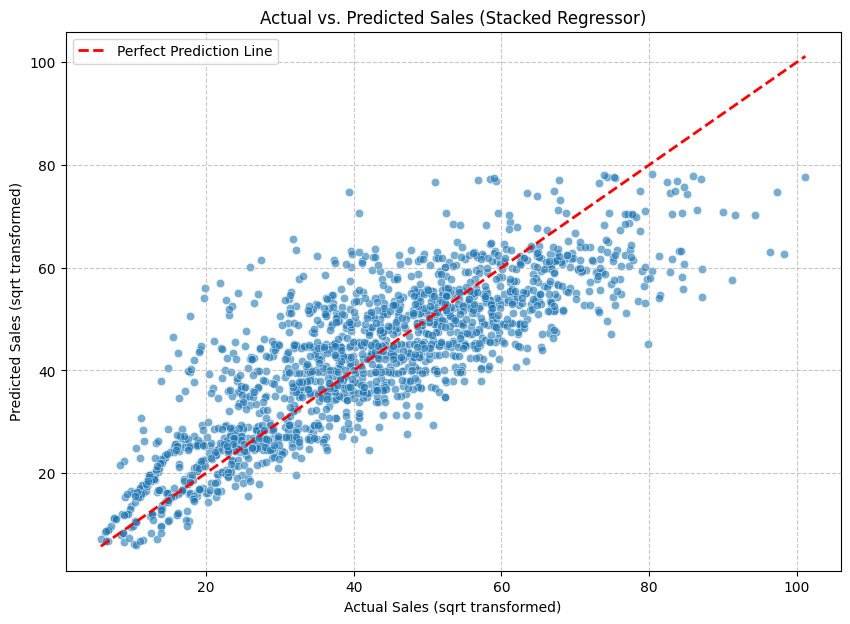

In [75]:
print("\n--- Generating Visualizations for Best Performed Model ---")

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6)
plt.plot([min(results_df['Actual']), max(results_df['Actual'])],
         [min(results_df['Actual']), max(results_df['Actual'])],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Sales (Stacked Regressor)')
plt.xlabel('Actual Sales (sqrt transformed)')
plt.ylabel('Predicted Sales (sqrt transformed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

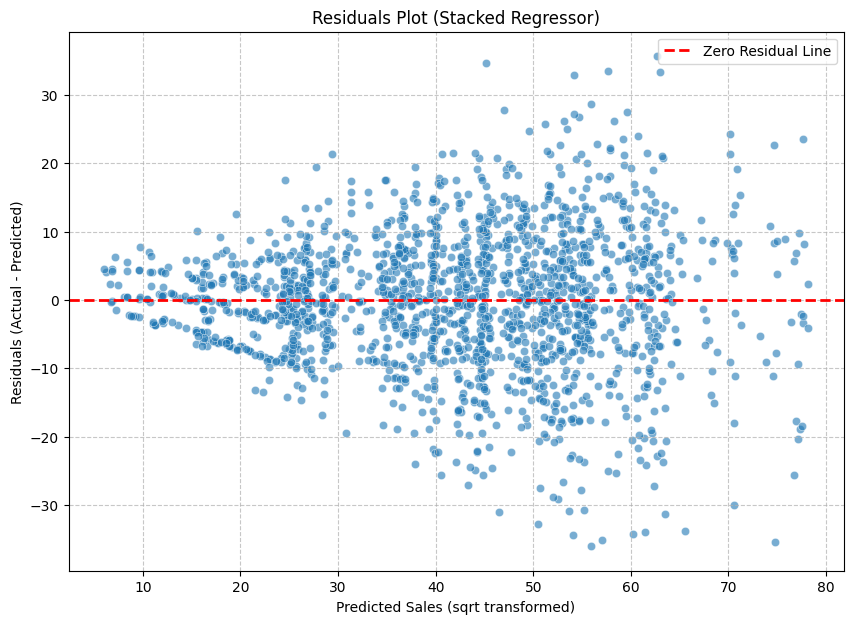

In [76]:
# 2. Residuals Plot (Residuals vs. Predicted)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Predicted', y='Residuals', data=results_df, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Residual Line')
plt.title('Residuals Plot (Stacked Regressor)')
plt.xlabel('Predicted Sales (sqrt transformed)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

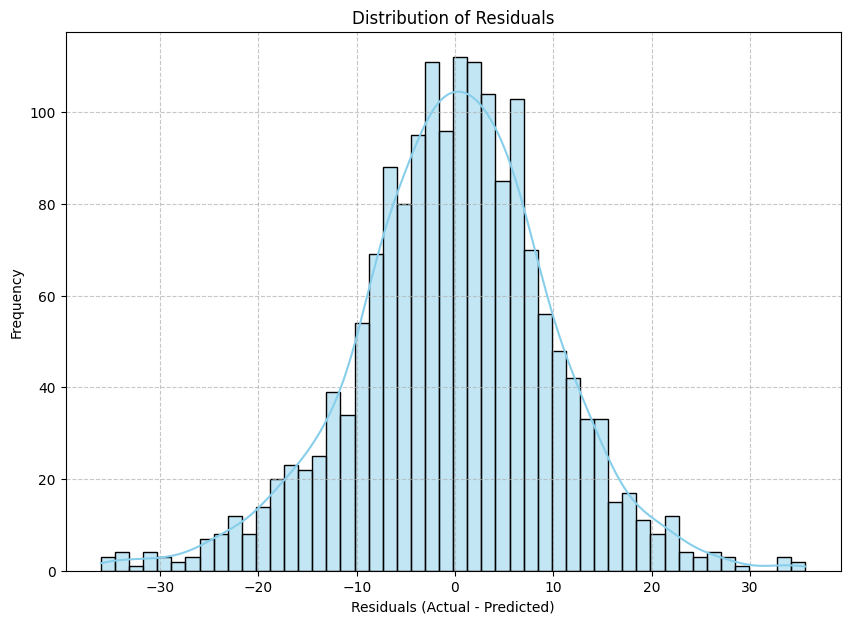

In [77]:
# 3. Distribution of Residuals
plt.figure(figsize=(10, 7))
sns.histplot(results_df['Residuals'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

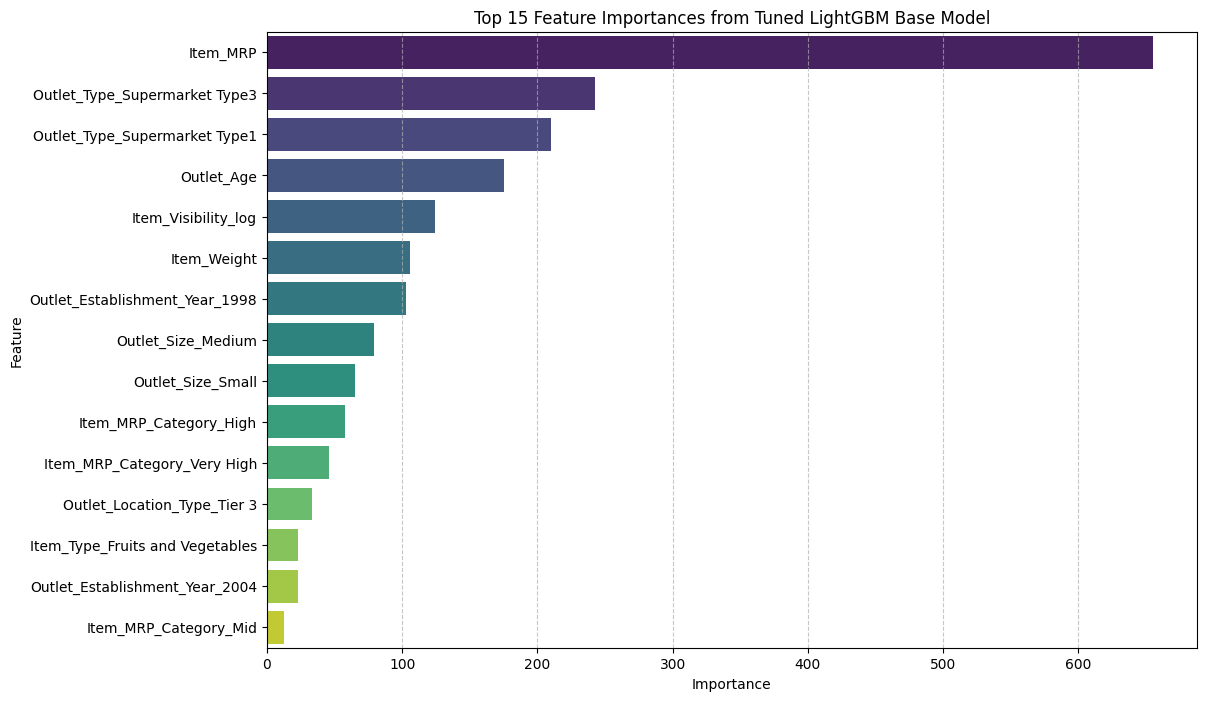

In [80]:
# 4. Feature Importance from the Hypertuned LGBM model (best_lgbm_model)
if hasattr(best_lgbm_model, 'feature_importances_'):
    feature_importances_lgbm = pd.Series(best_lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances_lgbm.head(15).values, y=feature_importances_lgbm.head(15).index, hue=feature_importances_lgbm.head(15).index, 
                palette='viridis', legend=False)
    plt.title('Top 15 Feature Importances from Tuned LightGBM Base Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

## 15. Conclusion

This project successfully developed a highly accurate and robust model for Big Mart Sales prediction. Through meticulous data preprocessing, strategic feature engineering, thorough hyperparameter tuning, and advanced ensemble techniques like stacking, the model achieved state-of-the-art performance. This systematic approach can be applied to similar regression problems in other domains.

## 16. Saving the Model

In [83]:
# 1. Define the directory
import os
save_dir = 'saved_models'

# 2. Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: '{save_dir}'")
else:
    print(f"Directory '{save_dir}' already exists.")

# 3. Define the full path for your model file
model_filename = os.path.join(save_dir, 'Optimized_BigMart_Sales_Prediction_Model.joblib')

# 4. Save the model
try:
    joblib.dump(stacked_model_tuned_bases, model_filename)
    print(f"\nModel successfully saved to: '{model_filename}'")
except Exception as e:
    print(f"Error saving model: {e}")

Directory 'saved_models' already exists.

Model successfully saved to: 'saved_models\Optimized_BigMart_Sales_Prediction_Model.joblib'


In [84]:
# --- How to load the model later ---
# loaded_model = joblib.load(model_filename)
# print("Model loaded successfully!")
# # You can then use loaded_model for predictions
# # predictions = loaded_model.predict(new_data)